In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('fruitvegprices-2017_2022.csv')

In [4]:
data.columns

Index(['category', 'item', 'variety', 'date', 'price', 'unit'], dtype='object')

In [5]:
data['date'] =pd.to_datetime(data['date'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9647 entries, 0 to 9646
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   category  9647 non-null   object        
 1   item      9647 non-null   object        
 2   variety   9647 non-null   object        
 3   date      9647 non-null   datetime64[ns]
 4   price     9647 non-null   float64       
 5   unit      9647 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 452.3+ KB


In [7]:
data.head()

category    item            variety       date  price unit
0    fruit  apples  bramleys_seedling 2022-03-11   2.05   kg
1    fruit  apples  coxs_orange_group 2022-03-11   1.22   kg
2    fruit  apples    egremont_russet 2022-03-11   1.14   kg
3    fruit  apples           braeburn 2022-03-11   1.05   kg
4    fruit  apples               gala 2022-03-11   1.03   kg

In [8]:
data.date.value_counts()

2018-09-28    65
2018-09-14    63
2018-09-07    62
2019-08-30    62
2019-08-16    61
              ..
2021-02-05    30
2021-01-08    30
2020-02-28    29
2020-04-10    29
2020-04-03    28
Name: date, Length: 218, dtype: int64

In [9]:
data.item.value_counts()

apples                  1077
cabbage                 1005
lettuce                  666
onion                    543
tomatoes                 445
pears                    312
capsicum                 303
rhubarb                  235
beans                    230
spring_greens            218
cauliflower              218
celeriac                 218
beetroot                 218
pak_choi                 218
curly_kale               217
carrots                  214
swede                    212
parsnips                 211
leeks                    208
turnip                   193
cucumbers                164
brussels_sprouts         143
strawberries             138
coriander                131
spinach_leaf             129
celery                   124
calabrese                116
mixed_babyleaf_salad     115
rocket                   109
raspberries              101
tulips                    97
watercress                92
chinese_leaf              86
courgettes                81
plums         

<AxesSubplot:>

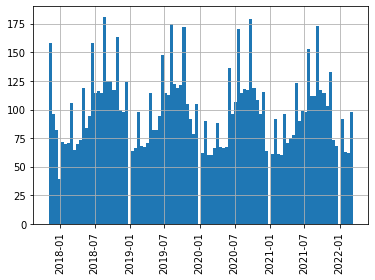

In [10]:
data.date.hist(bins=100, xrot=90)

In [11]:
for x in data.item.unique():
    print(x)
    for y in data[data.item == x].variety.unique():
        if(x!=y):
            print("\t{0}".format(y))

apples
	bramleys_seedling
	coxs_orange_group
	egremont_russet
	braeburn
	gala
	other_late_season
	other_mid_season
	other_early_season
pears
	conference
	doyenne_du_comice
	other
beetroot
brussels_sprouts
pak_choi
curly_kale
cabbage
	red
	savoy
	white
	round_green_other
	summer_autumn_pointed
spring_greens
	prepacked
carrots
	topped_washed
cauliflower
	all
celeriac
cucumbers
leeks
	trimmed
lettuce
	butterhead_indoor
	little_gem
	cos
	crisp_iceberg_type
onion
	bulb_brown
	bulb_red
	saladspring
swede
turnip
parsnips
	all_varieties
rhubarb
	forced
	outdoor
tulips
capsicum
	red
	green
	elongated
	yelloworange
chinese_leaf
celery
	all_washed
tomatoes
	vine
	round
	cherry
	plum
coriander
spinach_leaf
	loose_bunches
raspberries
calabrese
strawberries
blackberries
rocket
mixed_babyleaf_salad
	pillow_pack
gladioli
	all_varieties
sweetcorn
currants
	red
	black
blueberries
beans
	broad
	dwarf_french_or_kidney
	runner_climbing
courgettes
plums
	all_other
	victoria
peas
	shelling_all_varieties
cher

In [12]:
data.category.value_counts()

vegetable      7264
fruit          1992
cut_flowers     342
pot_plants       49
Name: category, dtype: int64

In [13]:
data.date.value_counts()

2018-09-28    65
2018-09-14    63
2018-09-07    62
2019-08-30    62
2019-08-16    61
              ..
2021-02-05    30
2021-01-08    30
2020-02-28    29
2020-04-10    29
2020-04-03    28
Name: date, Length: 218, dtype: int64

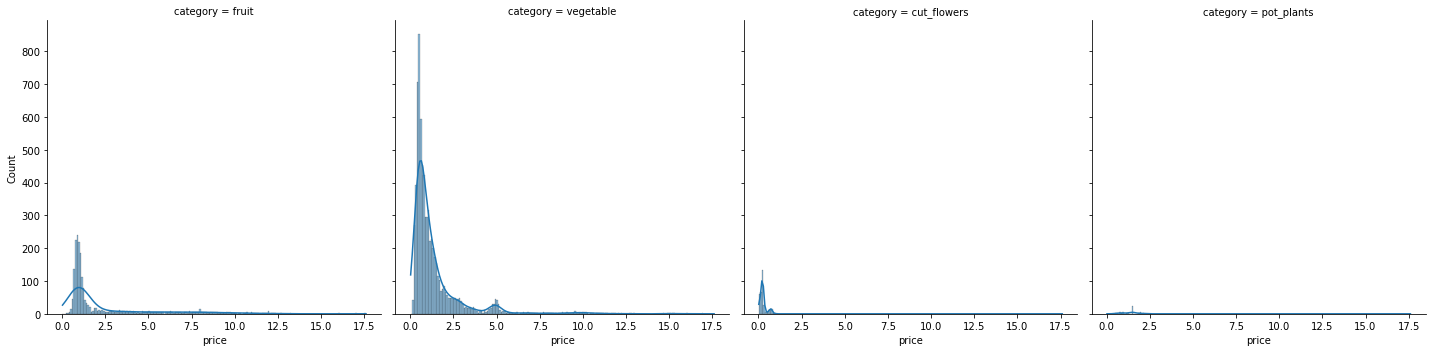

In [14]:
sns.displot(data=data, x="price", col="category", kde=True)

In [15]:

#print(data.apply(lambda x: len(data[data.category== x['category']].date.dt.strftime('%m').unique())))
data['MonthsSold'] = data.variety.apply(lambda x:  len(data[data['variety']== x].date.dt.strftime('%m').unique()))
data['Seasonal'] = data['MonthsSold']<12
data['Year'] = data.date.dt.strftime('%Y')
data['Month'] = data.date.dt.strftime('%m')

In [16]:
data['TimeFormJan1st'] =data.date - data.Year.apply(lambda x : pd.to_datetime("{0}-01-01".format(x)))
data['TimeFormJan1st'].info()

data['SecondsFromJan1st'] = data['TimeFormJan1st'].apply(lambda x: x.total_seconds())

<class 'pandas.core.series.Series'>
RangeIndex: 9647 entries, 0 to 9646
Series name: TimeFormJan1st
Non-Null Count  Dtype          
--------------  -----          
9647 non-null   timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 75.5 KB


In [17]:

fruit = data[data.category=='fruit']
veg = data[data.category=='vegetable']

In [18]:
data.head()

category    item            variety       date  price unit  MonthsSold  \
0    fruit  apples  bramleys_seedling 2022-03-11   2.05   kg          12   
1    fruit  apples  coxs_orange_group 2022-03-11   1.22   kg          10   
2    fruit  apples    egremont_russet 2022-03-11   1.14   kg           8   
3    fruit  apples           braeburn 2022-03-11   1.05   kg          12   
4    fruit  apples               gala 2022-03-11   1.03   kg          12   

   Seasonal  Year Month TimeFormJan1st  SecondsFromJan1st  
0     False  2022    03        69 days          5961600.0  
1      True  2022    03        69 days          5961600.0  
2      True  2022    03        69 days          5961600.0  
3     False  2022    03        69 days          5961600.0  
4     False  2022    03        69 days          5961600.0

In [19]:
data.MonthsSold.value_counts()

12    5368
9     1061
10     895
8      830
6      468
7      360
11     296
5      173
4      111
3       79
2        6
Name: MonthsSold, dtype: int64

<AxesSubplot:xlabel='date', ylabel='price'>

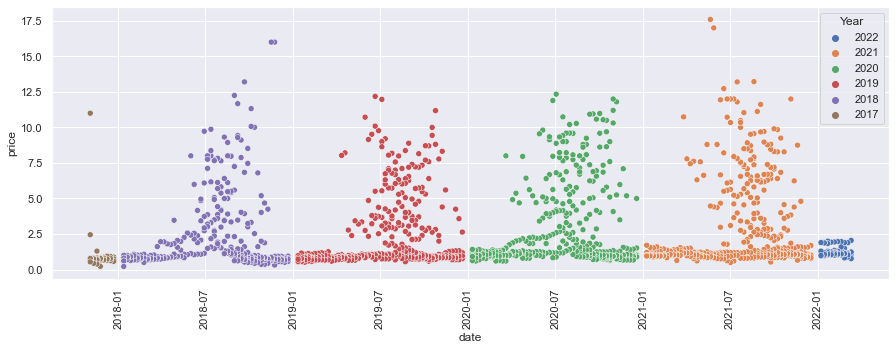

In [336]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 5))
ax1.tick_params(axis="x", labelrotation=90)
sns.scatterplot(ax=ax1,
    data=fruit,
    x="date", y="price",hue ='Year')

<AxesSubplot:xlabel='date', ylabel='price'>

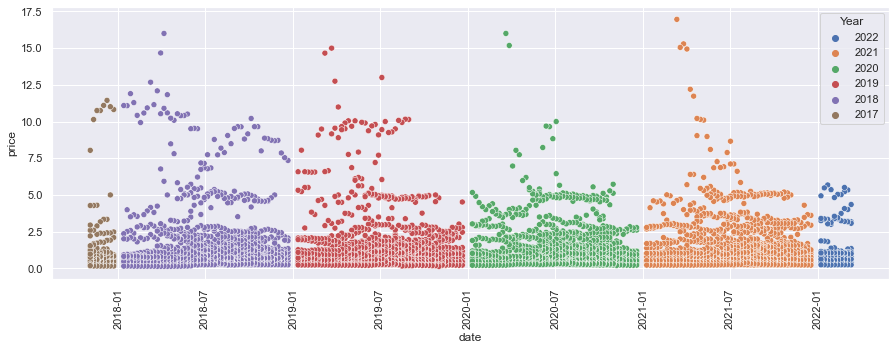

In [337]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 5))
ax1.tick_params(axis="x", labelrotation=90)
sns.scatterplot(ax=ax1,
    data=veg,
    x="date", y="price",hue ='Year')

In [22]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score


In [23]:
dataOrdered = data.sort_values(by='date', ignore_index=True)

indexes = []
for g in dataOrdered.Year.unique():
    indexes.append(dataOrdered[dataOrdered['Year']==g].index.to_list()[-1])
    


X = dataOrdered[['category','item','variety','SecondsFromJan1st', 'Year']]
y = dataOrdered[['price']]

X = pd.get_dummies(X)
X['SecondsFromJan1st'] = X['SecondsFromJan1st']/31536000


    
print(X.head())

   SecondsFromJan1st  category_cut_flowers  category_fruit  \
0           0.838356                     0               0   
1           0.838356                     0               0   
2           0.838356                     0               0   
3           0.838356                     0               0   
4           0.838356                     0               0   

   category_pot_plants  category_vegetable  item_alstromeria  item_apples  \
0                    1                   0                 0            0   
1                    0                   1                 0            0   
2                    0                   1                 0            0   
3                    0                   1                 0            0   
4                    0                   1                 0            0   

   item_asparagus  item_beans  item_beetroot  ...  variety_victoria  \
0               0           0              0  ...                 0   
1               0     

In [24]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear


# Evaluate each model in turn
results = []
names = []

for i in range(1,len(indexes)):
    if i == len(indexes)-2:
        break
    
    train_index_end = indexes[i]
    test_index_start = indexes[i]+1
    test_index_end = indexes[i+1]
    
    years = []
    for ind in indexes[0:i+1]:
        print(ind)
        years.append(dataOrdered.iloc[ind].Year)
        
    if len(years) == 2:
        display = [years[0]]
    else:
        display = years[0:len(years)-1]
    
    print("TRAIN:", display, "TEST:", years[-1])
    X_train, X_test = X.iloc[0:train_index_end], X.iloc[test_index_start:test_index_end]
    y_train, y_test = y.iloc[0:train_index_end], y.iloc[test_index_start:test_index_end]
    
    for name, model in models:
    # TimeSeries Cross validation

        cv_results = cross_val_score(model, X_train, y_train, scoring='r2')
        results.append(cv_results)
        names.append(name)
        print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


374
2733
TRAIN: ['2017'] TEST: 2018
LR: -264124616652119160651776.000000 (526739733175297164443648.000000)


C:\Users\Karl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\neural_network\_multila

NN: 0.479426 (0.580499)
KNN: 0.859171 (0.040702)


C:\Users\Karl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

RF: 0.842595 (0.034528)


C:\Users\Karl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

SVR: 0.237223 (0.073191)
374
2733
5004
TRAIN: ['2017', '2018'] TEST: 2019
LR: -7887530810977366835200.000000 (12705749616991433392128.000000)


C:\Users\Karl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\neural_network\_multila

NN: 0.723732 (0.060244)
KNN: 0.859336 (0.017725)


C:\Users\Karl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

RF: 0.852064 (0.036510)


C:\Users\Karl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

SVR: 0.394167 (0.066264)
374
2733
5004
7169
TRAIN: ['2017', '2018', '2019'] TEST: 2020
LR: -543428771057020214181888.000000 (1086857542114040428363776.000000)


C:\Users\Karl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Karl\anaconda3\lib\site-packages\sklearn\neural_network\_multila

KeyboardInterrupt: 

In [25]:
model= KNeighborsRegressor()

print(indexes)
print(len(dataOrdered))

for i in range(1,len(indexes)):
    if i == len(indexes)-1:
        break
    
    train_index_end = indexes[i]
    test_index_start = indexes[i]+1
    test_index_end = indexes[i+1]
    
    years = []
    for ind in indexes[0:i+1]:
        years.append(dataOrdered.iloc[ind].Year)
        
    if len(years) == 2:
        display = [years[0]]
    else:
        display = years[0:len(years)-1]
    
    print("TRAIN:", display, "TEST:", years[-1])
    X_train, X_test = X.iloc[0:train_index_end], X.iloc[test_index_start:test_index_end]
    y_train, y_test = y.iloc[0:train_index_end], y.iloc[test_index_start:test_index_end]
    
    
    model = KNeighborsRegressor()
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))

[374, 2733, 5004, 7169, 9331, 9646]
9647
TRAIN: ['2017'] TEST: 2018
0.8392517643185898
TRAIN: ['2017', '2018'] TEST: 2019
0.8489846058541821
TRAIN: ['2017', '2018', '2019'] TEST: 2020
0.8440792014021791
TRAIN: ['2017', '2018', '2019', '2020'] TEST: 2021
0.8535328203741424


In [26]:
data['date'].describe(datetime_is_numeric=True)

count                             9647
mean     2019-12-26 16:04:34.655333376
min                2017-11-03 00:00:00
25%                2018-11-05 12:00:00
50%                2019-11-22 00:00:00
75%                2021-01-22 00:00:00
max                2022-03-11 00:00:00
Name: date, dtype: object

In [322]:
from datetime import datetime
grouped = dataOrdered.groupby(['Year','Month','category','item','variety'])['price'].mean()

ungrouped = grouped.reset_index()
ungrouped['Year'] = pd.to_numeric(ungrouped['Year'])
ungrouped['Month'] = pd.to_numeric(ungrouped['Month'])

firstInstances = {}

def calcMonthlyPercentChange(x):
    year = x['Year']
    month = x['Month']
    newPrice = x['price']
    
    
    varieties = ungrouped[(ungrouped['item']== x['item']) &( ungrouped['variety']==x.variety)]
    lastMonth = (int(month)+12-1)%12
    lastMonthYear = year-1 if month==1 else year
    
    lastMonthDF = varieties[(varieties['Year'] == lastMonthYear) & (varieties['Month'] == lastMonth)]
    
    if(len(lastMonthDF)>0):
        oldPrice = lastMonthDF.iloc[0]['price']
        return abs(newPrice-oldPrice)/oldPrice
    
    return np.nan

def calcYearlyPercentChange(x):
    year = x.Year
    month = x.Month
    newPrice = x.price
    
    
    varieties = ungrouped[(ungrouped['item']== x['item']) &( ungrouped['variety']==x.variety)]
    lastYear = varieties[(varieties['Year'] == year-1) & (varieties['Month'] == month)]
    
    
    if(len(lastYear)>0):
        oldPrice = lastYear.iloc[0]['price']
        return (newPrice-oldPrice)/oldPrice

def makeDateTime(x):
    return datetime(x['Year'],x['Month'],1)


def percentChangeSinceFirstRecord(x):
    year = x['Year']
    month = x['Month']
    newPrice = x['price']
    itemDesc = x['item']
    varietyDesc = x['variety']
    
    if(not (itemDesc in firstInstances.keys())):
        firstInstances[itemDesc]= {}
        
    if(not (varietyDesc in firstInstances[itemDesc].keys())):
        firstInstances[itemDesc][varietyDesc] = newPrice
        return 0
    
    firstPrice = firstInstances[itemDesc][varietyDesc]
    return (newPrice-firstPrice)/firstPrice
    

def ratioToFirstRecord(x):
    year = x['Year']
    month = x['Month']
    newPrice = x['price']
    itemDesc = x['item']
    varietyDesc = x['variety']
    
    if(not (itemDesc in firstInstances.keys())):
        firstInstances[itemDesc]= {}
        
    if(not (varietyDesc in firstInstances[itemDesc].keys())):
        firstInstances[itemDesc][varietyDesc] = newPrice
        return 0
    
    firstPrice = firstInstances[itemDesc][varietyDesc]
    return (newPrice)/firstPrice
    
    
ungrouped['MonthlyPercentChange'] = ungrouped.apply(lambda row: calcMonthlyPercentChange(row), axis=1)
ungrouped['YearlyPercentChange'] = ungrouped.apply(lambda row: calcYearlyPercentChange(row), axis=1)
ungrouped['PercentChangeSinceFirstInstance'] = ungrouped.apply(lambda row: percentChangeSinceFirstRecord(row), axis=1)
ungrouped['ratioToFirstRecord'] = ungrouped.apply(lambda row: ratioToFirstRecord(row), axis=1)

ungrouped['Date'] = ungrouped.apply(lambda row: makeDateTime(row), axis=1)
ungrouped['Date'] = pd.to_datetime(ungrouped['Date'])
print(ungrouped.head())

   Year  Month     category           item       variety   price  \
0  2017     11  cut_flowers    alstromeria        indoor  0.2700   
1  2017     11  cut_flowers  chrysanthemum  indoor_spray  0.2050   
2  2017     11  cut_flowers        lillies      oriental  0.7725   
3  2017     11  cut_flowers      narcissus        indoor  0.0625   
4  2017     11  cut_flowers      narcissus       outdoor  0.0600   

   MonthlyPercentChange  YearlyPercentChange  PercentChangeSinceFirstInstance  \
0                   NaN                  NaN                              0.0   
1                   NaN                  NaN                              0.0   
2                   NaN                  NaN                              0.0   
3                   NaN                  NaN                              0.0   
4                   NaN                  NaN                              0.0   

   ratioToFirstRecord       Date  
0                 1.0 2017-11-01  
1                 1.0 2017-11-01  

In [324]:
monthChanges = ungrouped[['Year','Month','category','item','variety','MonthlyPercentChange']].dropna()

print(monthChanges.MonthlyPercentChange.describe())

monthChanges.groupby(['Year','Month','category','item','variety']).sum()
monthChanges = monthChanges.reset_index()
monthChanges.sort_values(by='MonthlyPercentChange', ascending=False)

count    2116.000000
mean        0.132391
std         0.181405
min         0.000000
25%         0.031141
50%         0.076923
75%         0.166667
max         3.285714
Name: MonthlyPercentChange, dtype: float64


index  Year  Month     category                  item        variety  \
929    1183  2019      9    vegetable              tomatoes           plum   
188     311  2018      5    vegetable                turnip         turnip   
772    1011  2019      7    vegetable             asparagus      asparagus   
364     522  2018      9        fruit          strawberries   strawberries   
1063   1323  2019     12    vegetable              capsicum   yelloworange   
...     ...   ...    ...          ...                   ...            ...   
61      161  2018      2   pot_plants              cyclamen          13_cm   
663     876  2019      4    vegetable  mixed_babyleaf_salad    pillow_pack   
1360   1700  2020      9  cut_flowers              gladioli  all_varieties   
544     712  2018     12   pot_plants            poinsettia          13_cm   
1        61  2017     12  cut_flowers         chrysanthemum   indoor_spray   

      MonthlyPercentChange  
929               3.285714  
188               2.351955  
772               1.544031  
364               1.483085  
1063              1.339181  
...                    ...  
61                0.000000  
663               0.000000  
1360              0.000000  
544               0.000000  
1                 0.000000  

[2116 rows x 7 columns]

In [110]:
ungrouped[ungrouped['item']=='apples'].apply(lambda row: calcMonthlyPercentChange(row), axis=1)

6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
          ...   
2554   -0.012853
2555    0.124542
2556    0.023355
2557    0.000000
2558    0.204868
Length: 297, dtype: float64

In [177]:
ungrouped[(ungrouped['item']=='apples') & (ungrouped['variety']=='braeburn')]

Year  Month category    item   variety     price  MonthlyPercentChange  \
6     2017     11    fruit  apples  braeburn  0.660000                   NaN   
66    2017     12    fruit  apples  braeburn  0.710000              0.075758   
115   2018      1    fruit  apples  braeburn  0.750000                   NaN   
152   2018      2    fruit  apples  braeburn  0.767500              0.023333   
189   2018      3    fruit  apples  braeburn  0.822000              0.071010   
227   2018      4    fruit  apples  braeburn  0.810000             -0.014599   
506   2018      9    fruit  apples  braeburn  1.050000                   NaN   
575   2018     10    fruit  apples  braeburn  0.775000             -0.261905   
643   2018     11    fruit  apples  braeburn  0.748000             -0.034839   
703   2018     12    fruit  apples  braeburn  0.720000             -0.037433   
744   2019      1    fruit  apples  braeburn  0.773333                   NaN   
778   2019      2    fruit  apples  braeburn  0.802500              0.037716   
811   2019      3    fruit  apples  braeburn  0.770000             -0.040498   
850   2019      4    fruit  apples  braeburn  0.832500              0.081169   
893   2019      5    fruit  apples  braeburn  0.892000              0.071471   
942   2019      6    fruit  apples  braeburn  1.027500              0.151906   
999   2019      7    fruit  apples  braeburn  1.012500             -0.014599   
1059  2019      8    fruit  apples  braeburn  0.747500             -0.261728   
1188  2019     10    fruit  apples  braeburn  0.890000                   NaN   
1248  2019     11    fruit  apples  braeburn  0.918000              0.031461   
1305  2019     12    fruit  apples  braeburn  0.843333             -0.081336   
1346  2020      1    fruit  apples  braeburn  0.855000                   NaN   
1378  2020      2    fruit  apples  braeburn  0.865000              0.011696   
1409  2020      3    fruit  apples  braeburn  0.905000              0.046243   
1445  2020      4    fruit  apples  braeburn  1.085000              0.198895   
1479  2020      5    fruit  apples  braeburn  1.172000              0.080184   
1525  2020      6    fruit  apples  braeburn  1.130000             -0.035836   
1764  2020     10    fruit  apples  braeburn  0.930000                   NaN   
1828  2020     11    fruit  apples  braeburn  0.835000             -0.102151   
1881  2020     12    fruit  apples  braeburn  0.880000              0.053892   
1914  2021      1    fruit  apples  braeburn  0.957500                   NaN   
1945  2021      2    fruit  apples  braeburn  0.955000             -0.002611   
1976  2021      3    fruit  apples  braeburn  1.047500              0.096859   
2010  2021      4    fruit  apples  braeburn  1.094000              0.044391   
2053  2021      5    fruit  apples  braeburn  1.032500             -0.056216   
2096  2021      6    fruit  apples  braeburn  0.920000             -0.108959   
2152  2021      7    fruit  apples  braeburn  0.550000             -0.402174   
2273  2021      9    fruit  apples  braeburn  0.530000                   NaN   
2337  2021     10    fruit  apples  braeburn  1.095000              1.066038   
2399  2021     11    fruit  apples  braeburn  1.090000             -0.004566   
2451  2021     12    fruit  apples  braeburn  0.860000             -0.211009   
2488  2022      1    fruit  apples  braeburn  0.995000                   NaN   
2519  2022      2    fruit  apples  braeburn  1.057500              0.062814   
2553  2022      3    fruit  apples  braeburn  1.060000              0.002364   

      YearlyPercentChange  PercentChangeSinceFirstInstance       Date  
6                     NaN                         0.000000 2017-11-01  
66                    NaN                         0.075758 2017-12-01  
115                   NaN                         0.136364 2018-01-01  
152                   NaN                         0.162879 2018-02-01  
189                   NaN                    

<AxesSubplot:xlabel='Date', ylabel='YearlyPercentChange'>

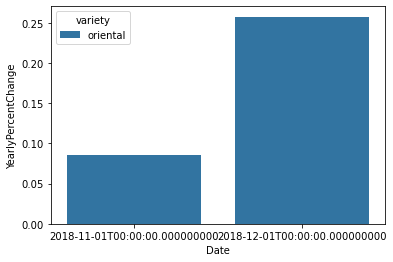

In [143]:
sns.barplot(data = ungrouped[ungrouped['item']=='lillies'][['Date','variety','YearlyPercentChange']].dropna(), x = 'Date', y='YearlyPercentChange', hue='variety')



alstromeria


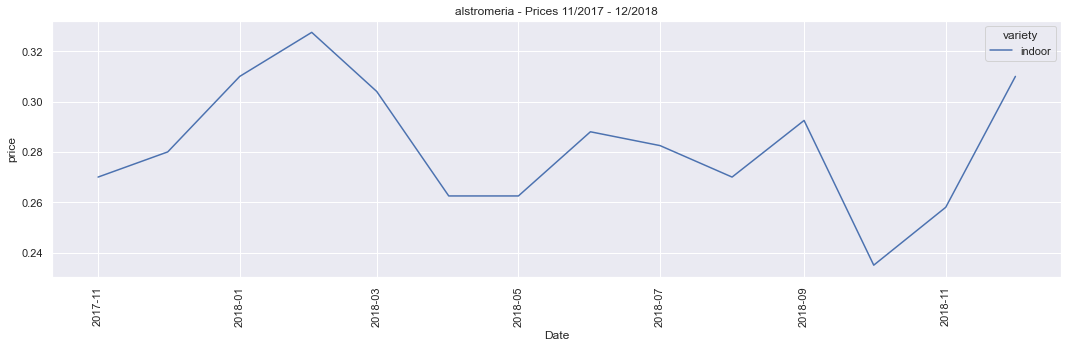

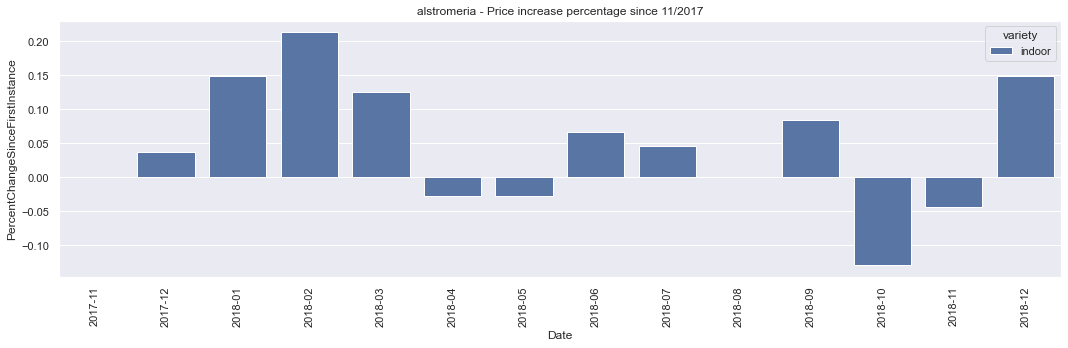



chrysanthemum


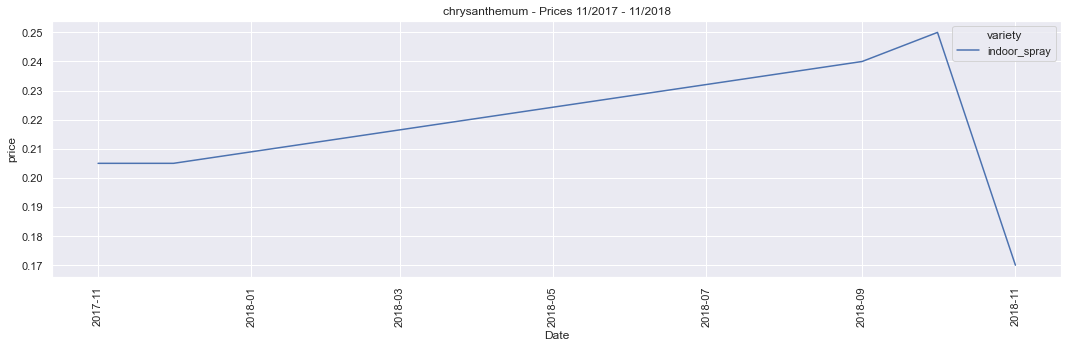

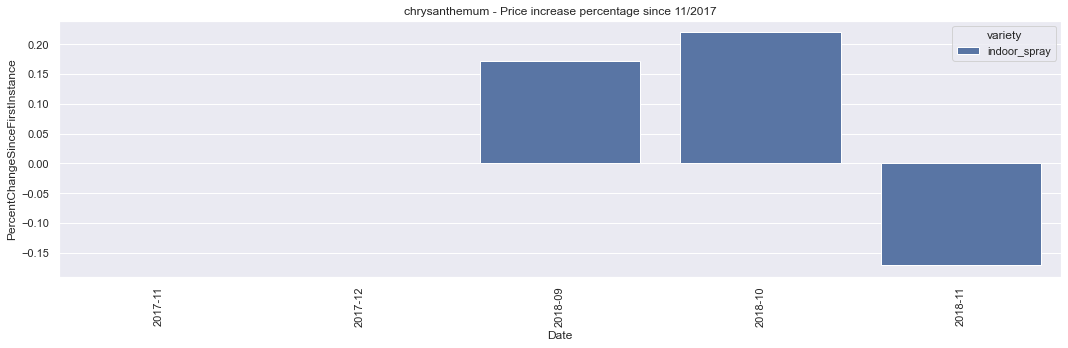



lillies


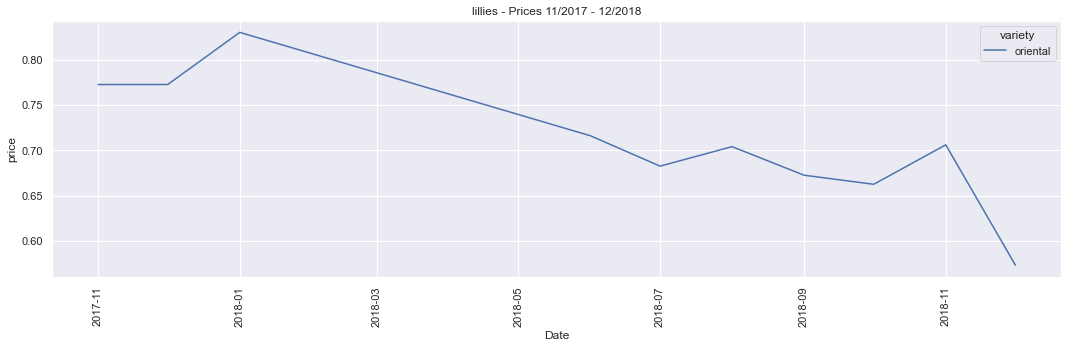

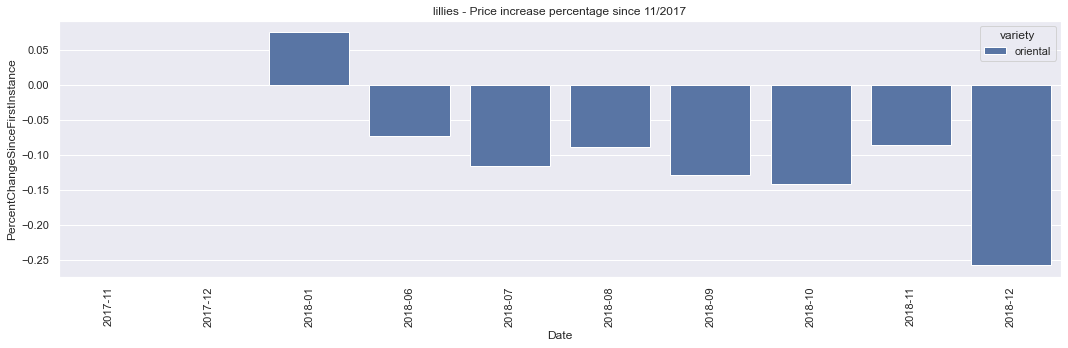



narcissus


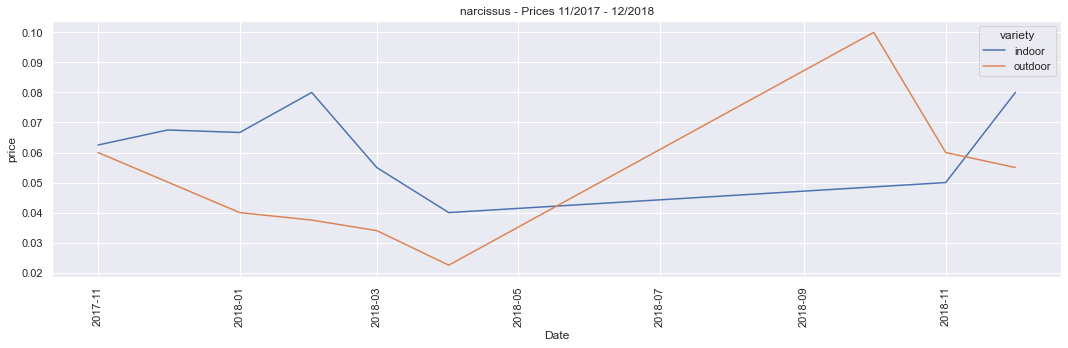

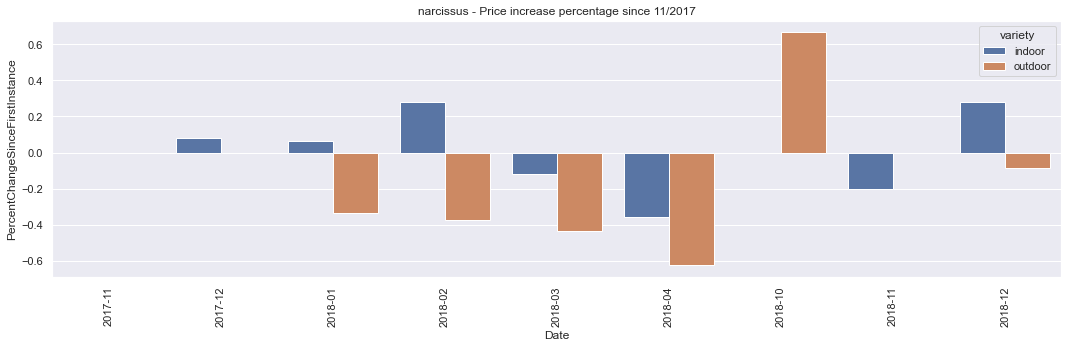



stocks


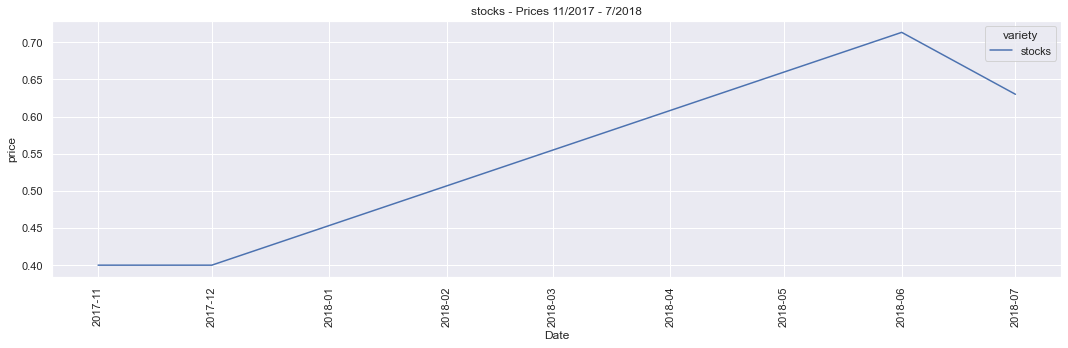

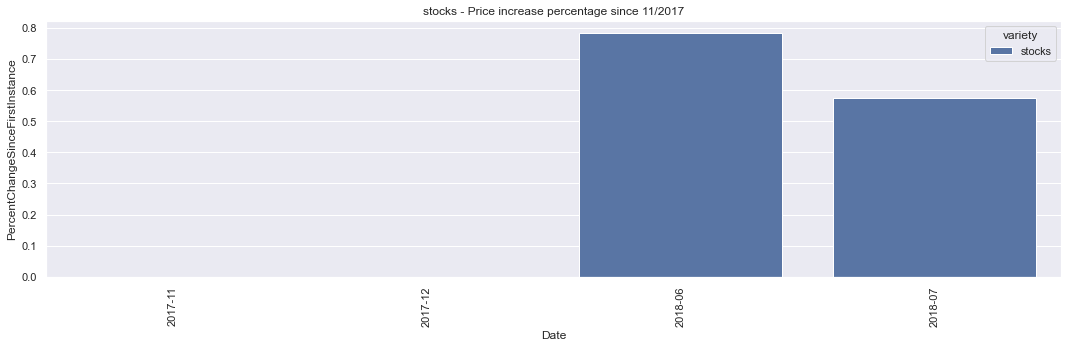



apples


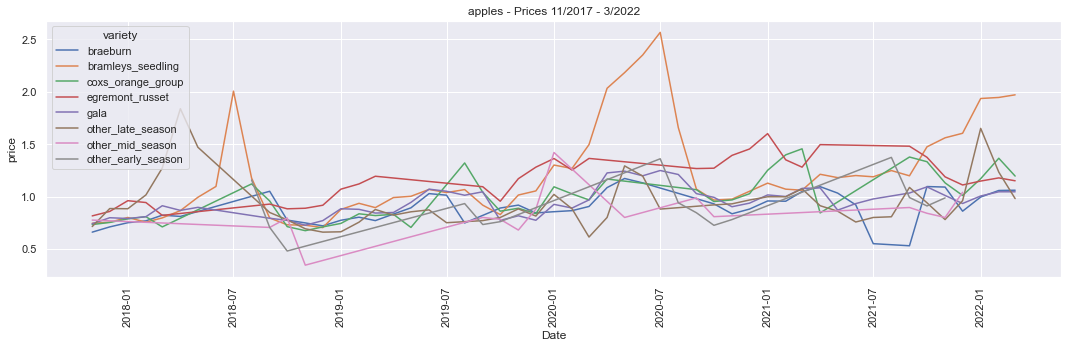

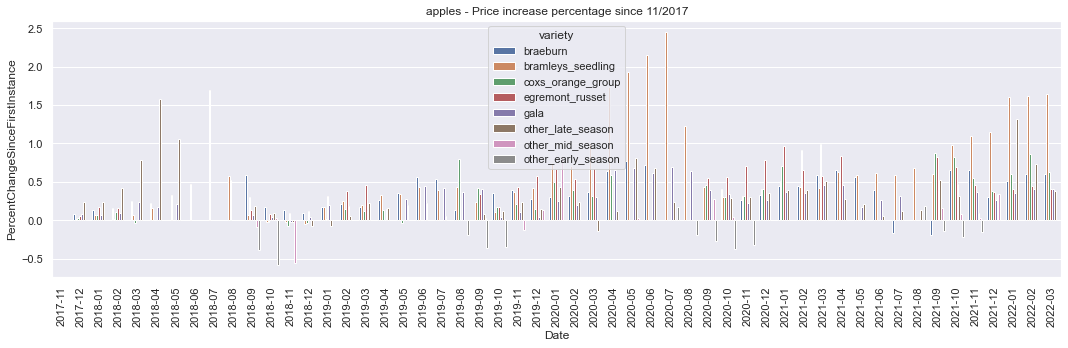



pears


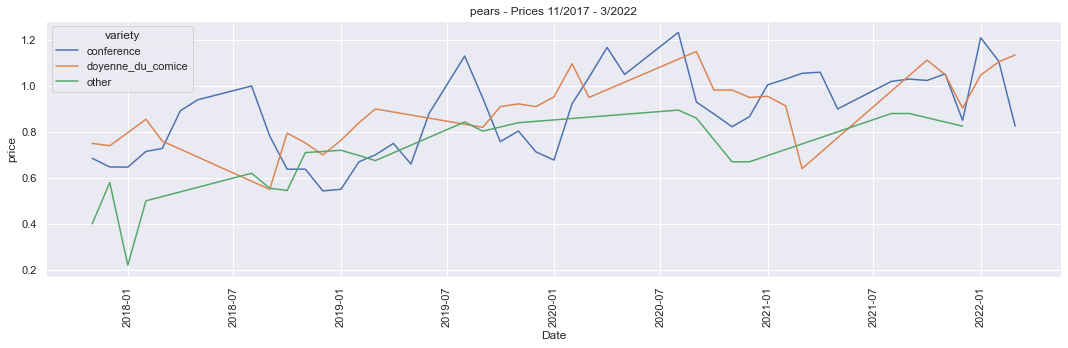

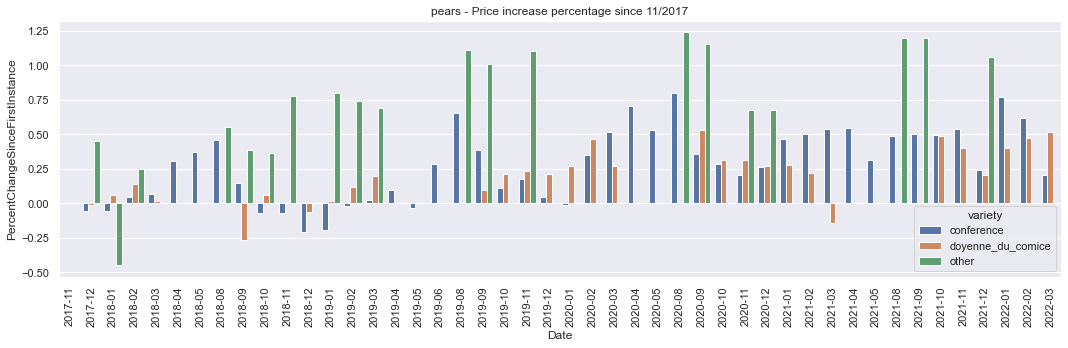



raspberries


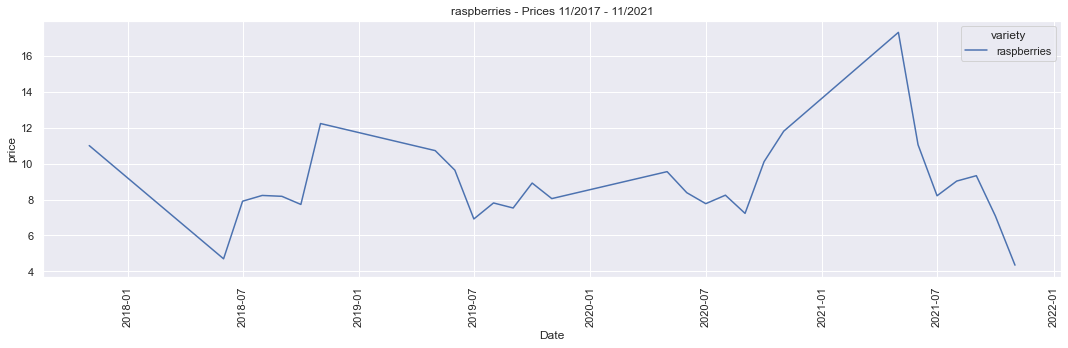

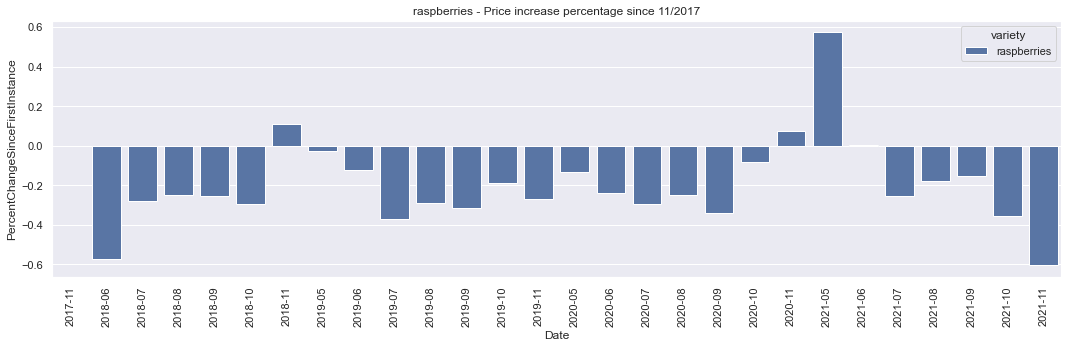



strawberries


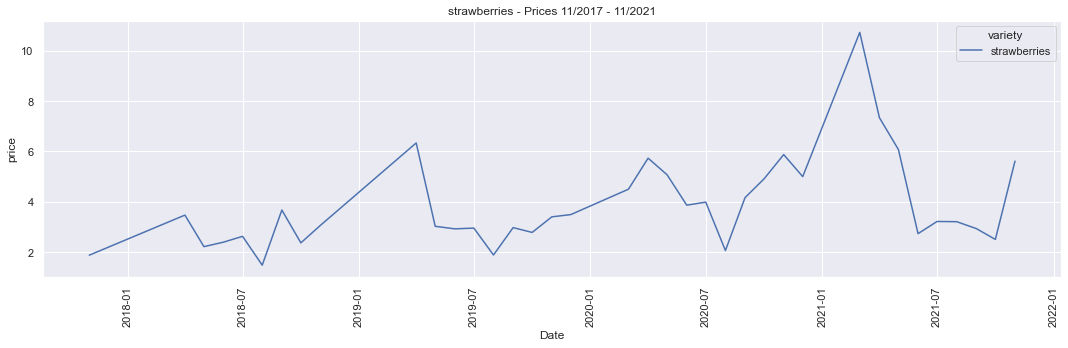

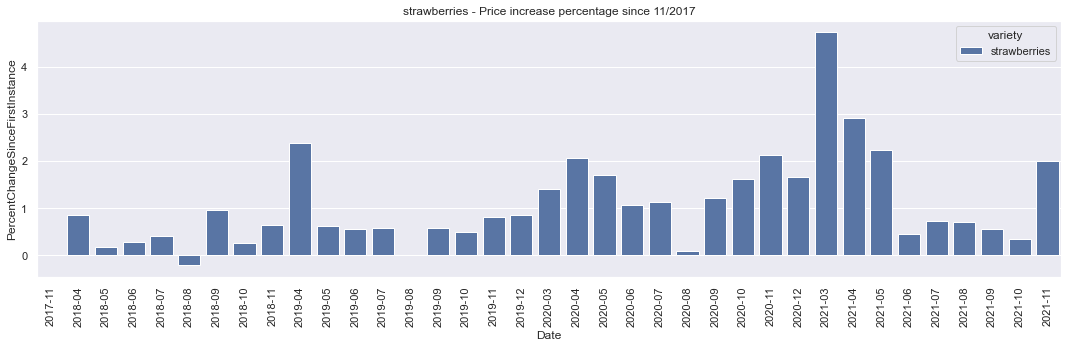



cyclamen


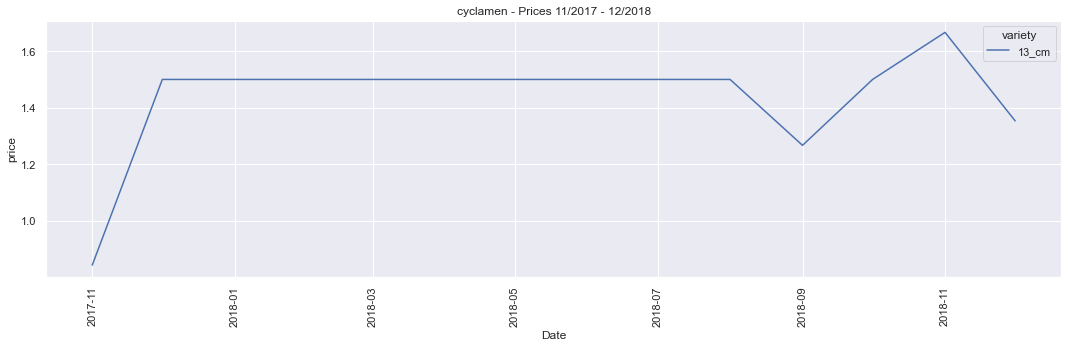

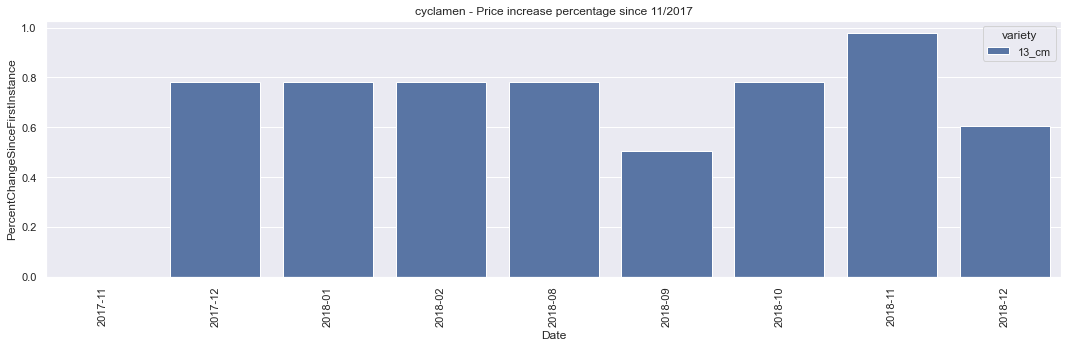



beetroot


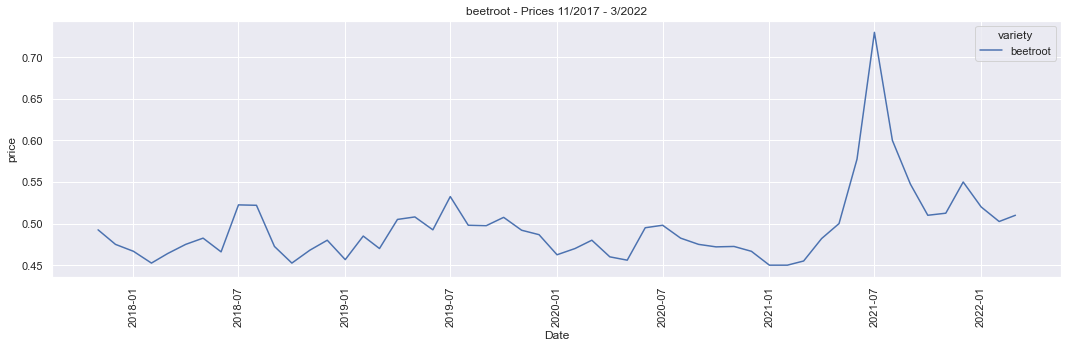

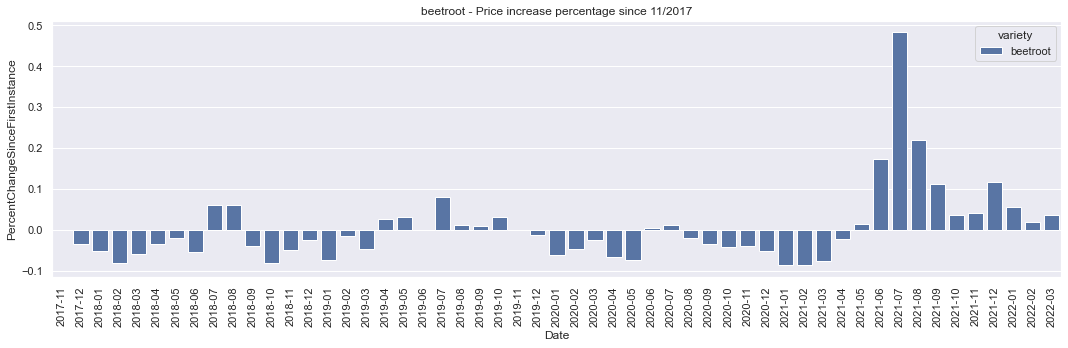



brussels_sprouts


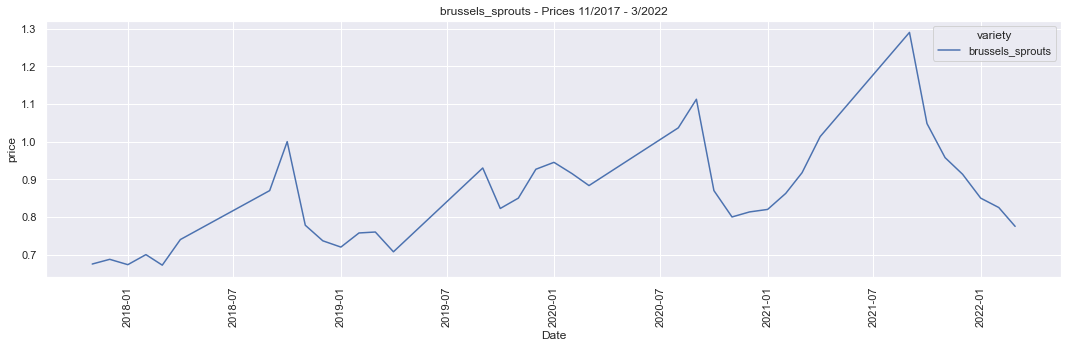

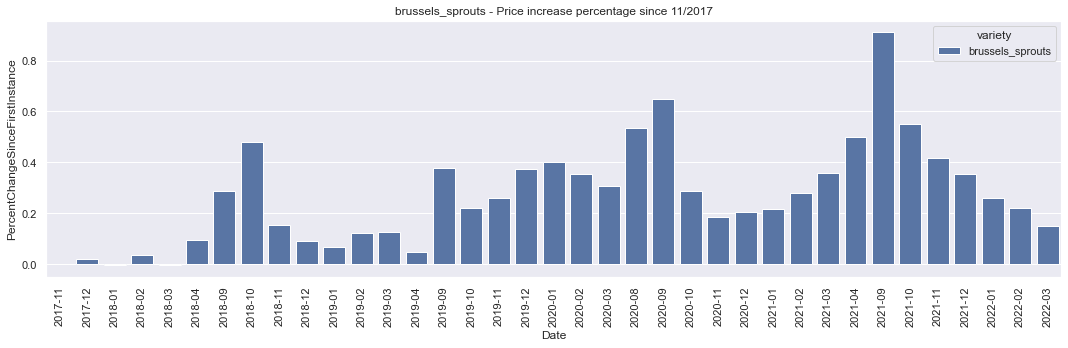



cabbage


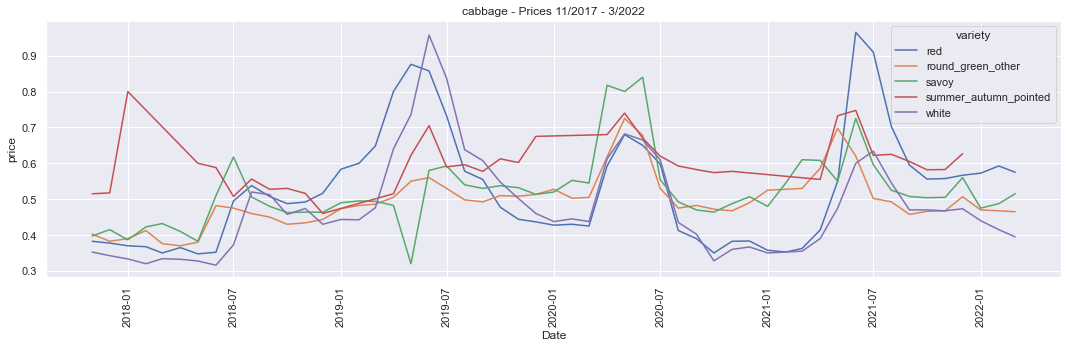

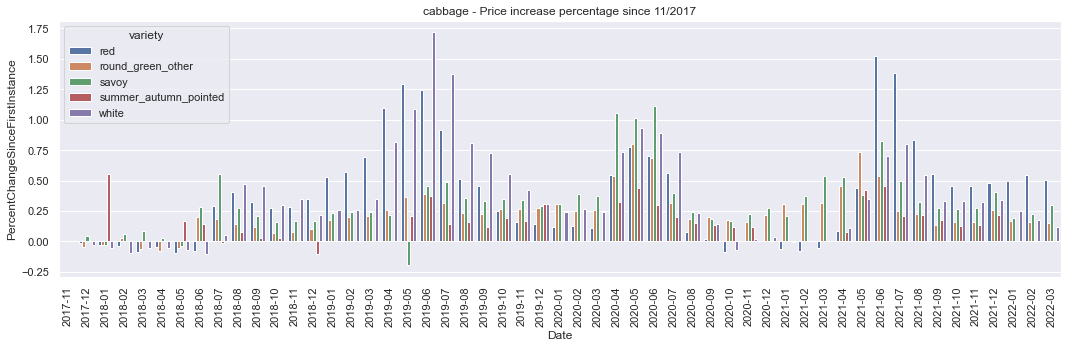



calabrese


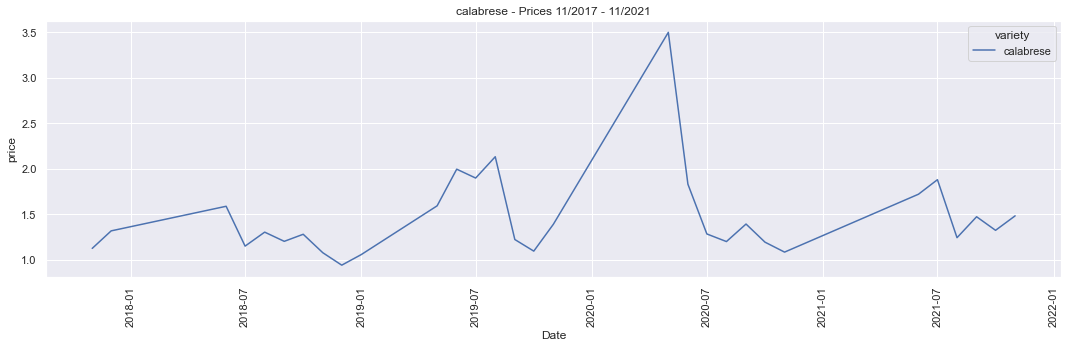

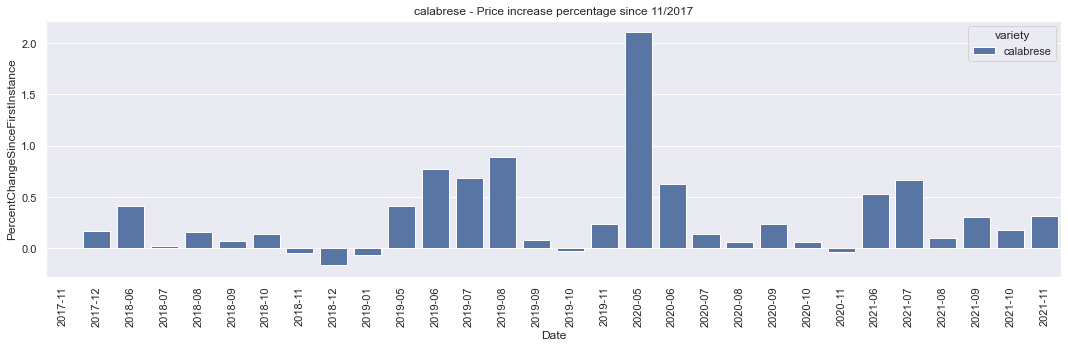



capsicum


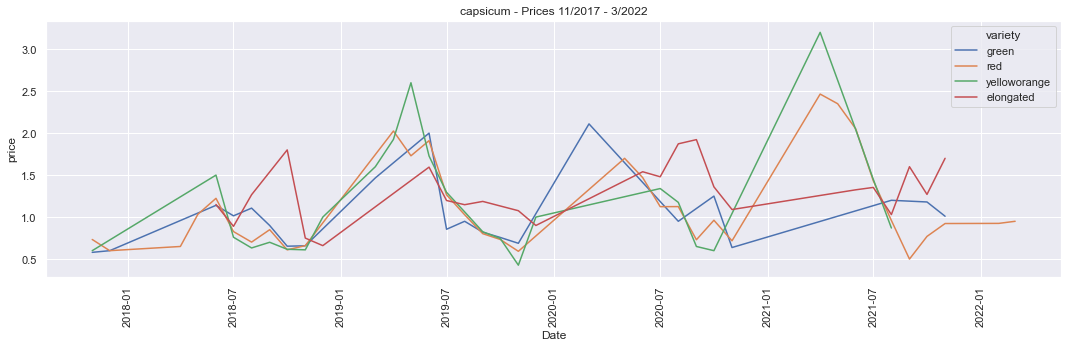

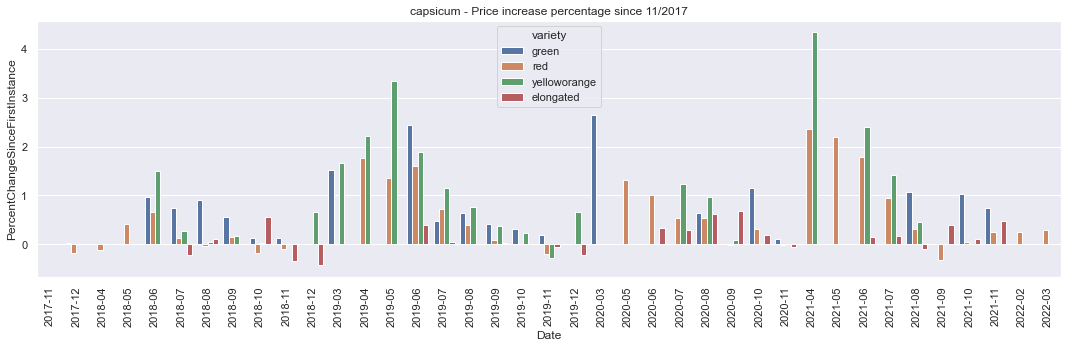



carrots


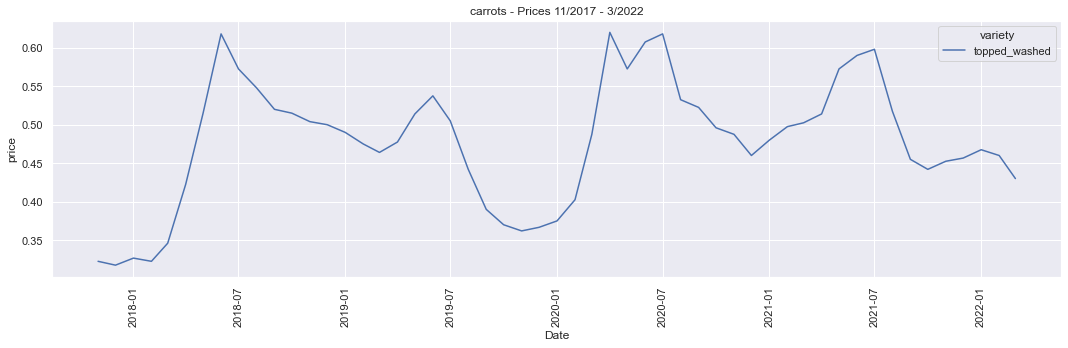

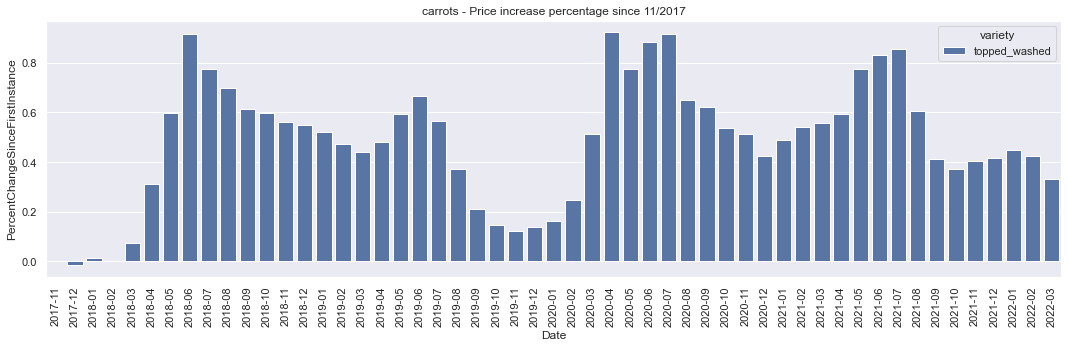



cauliflower


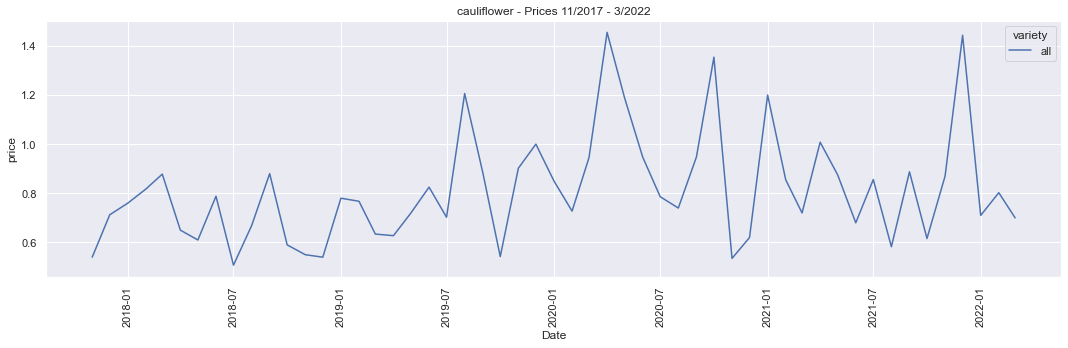

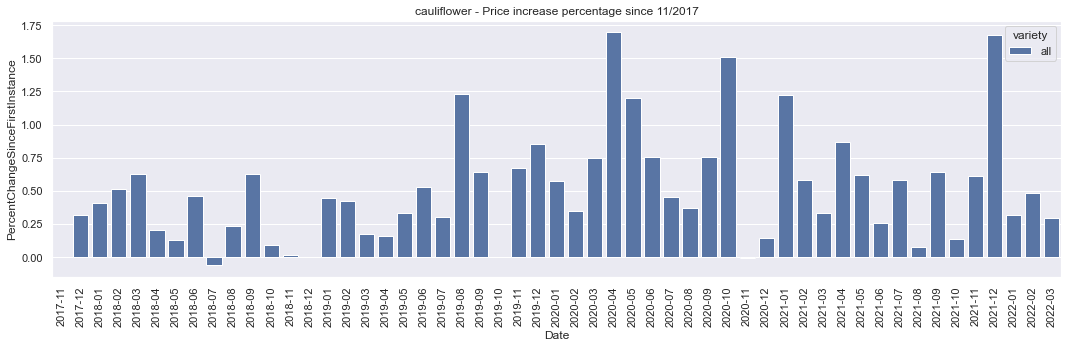



celeriac


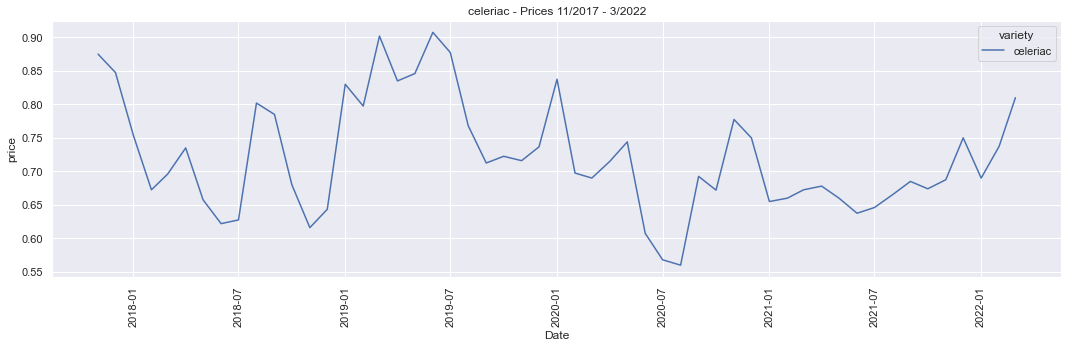

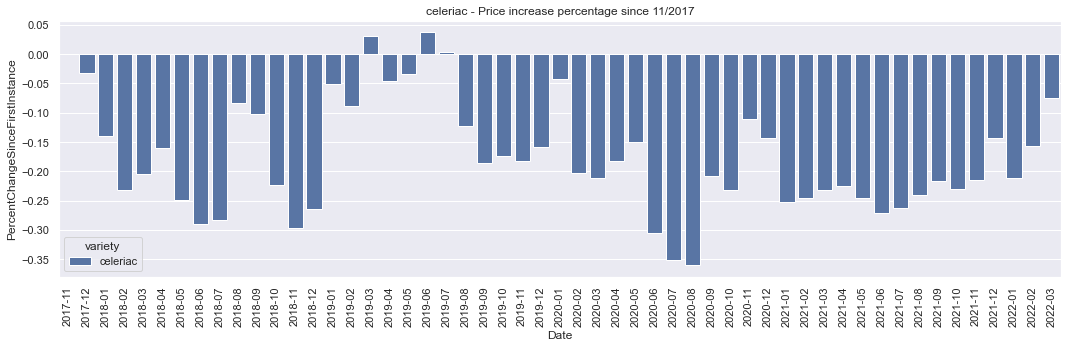



celery


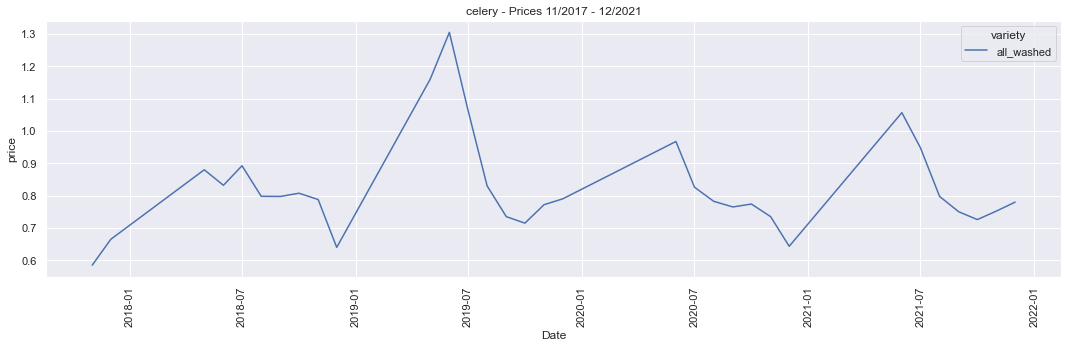

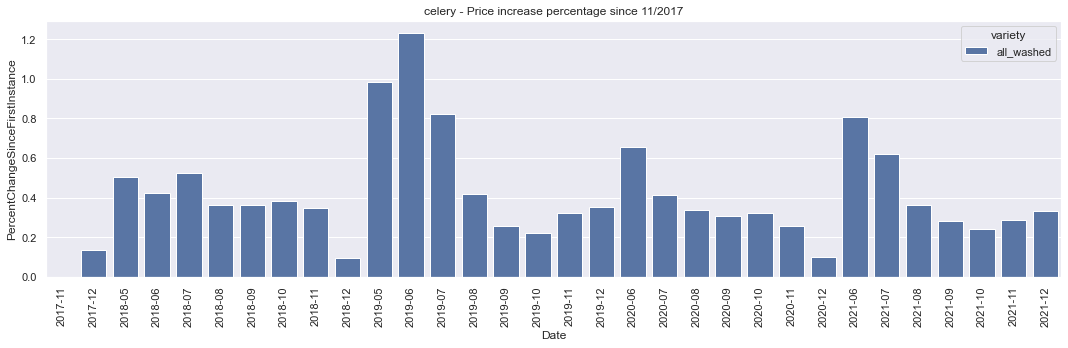



coriander


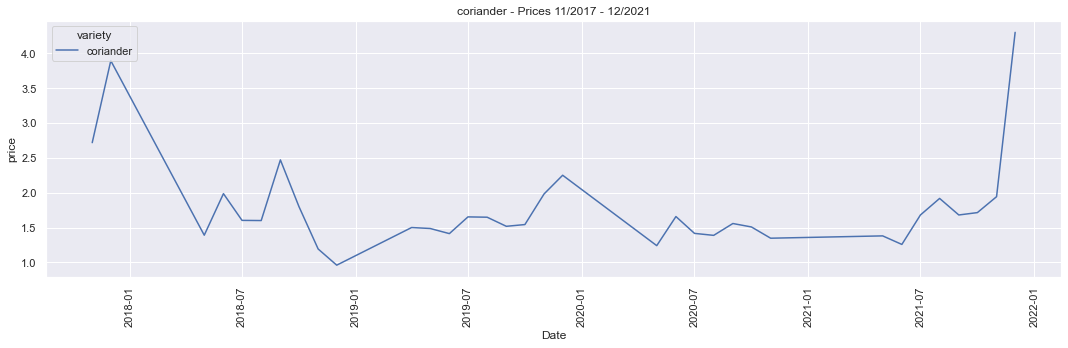

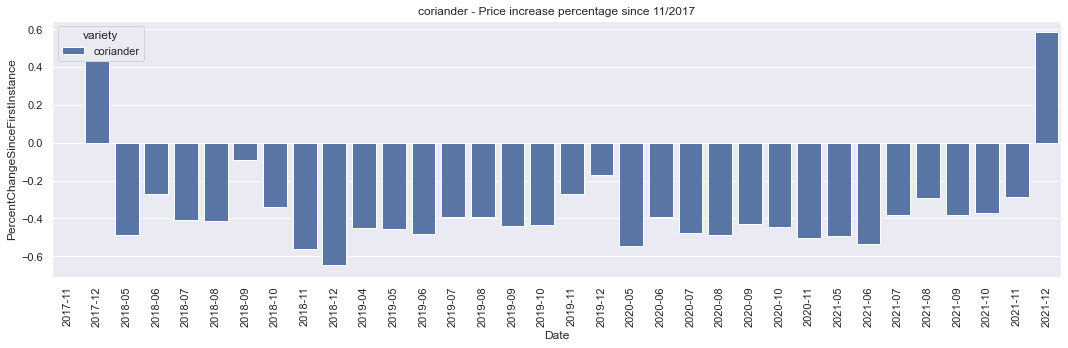



courgettes


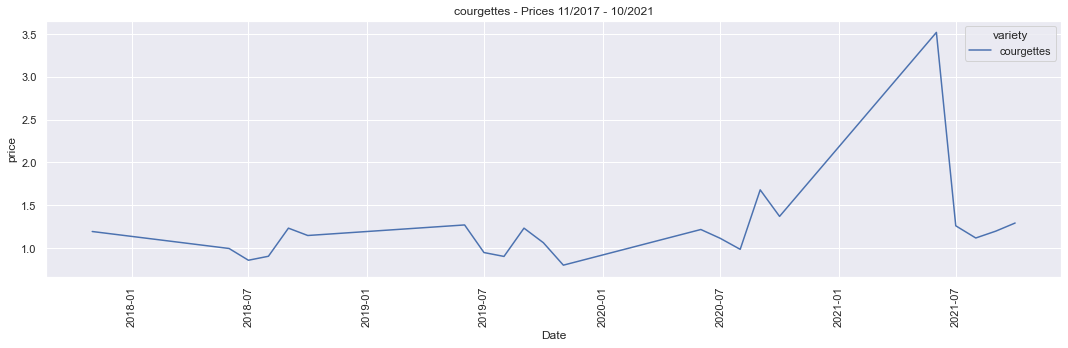

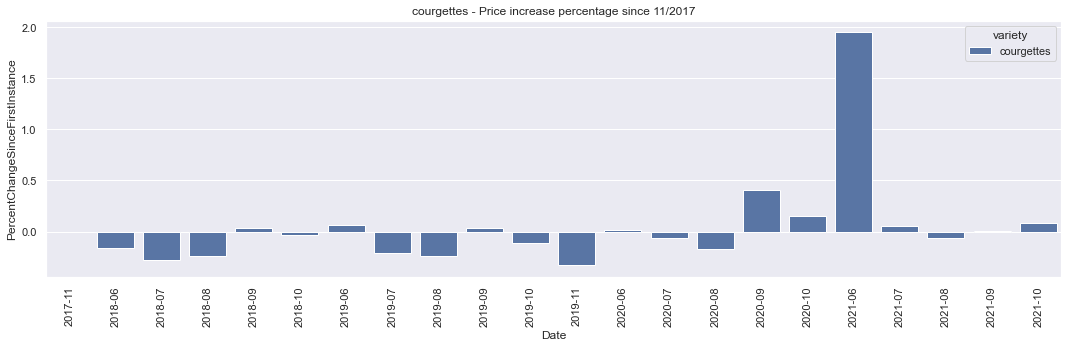



cucumbers


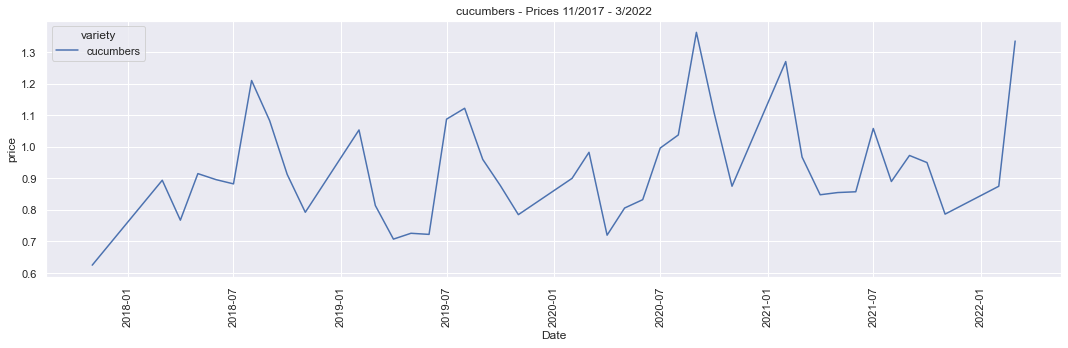

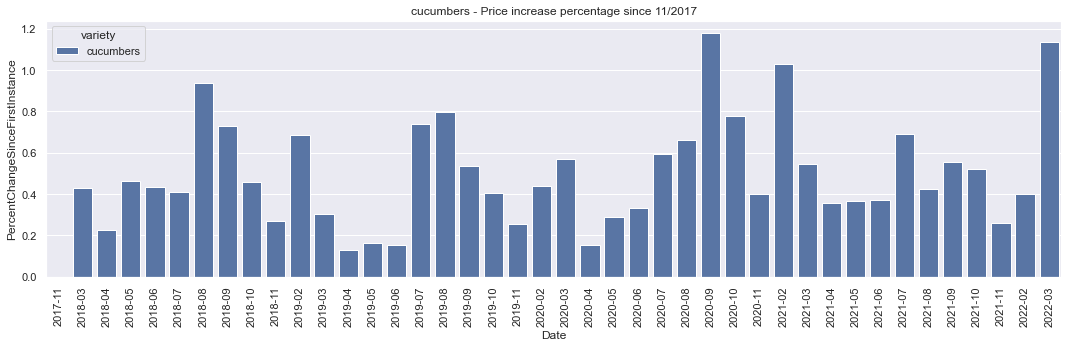



curly_kale


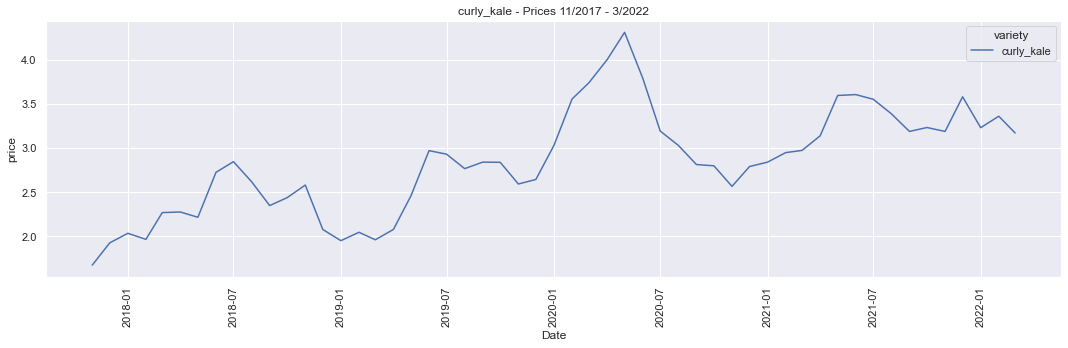

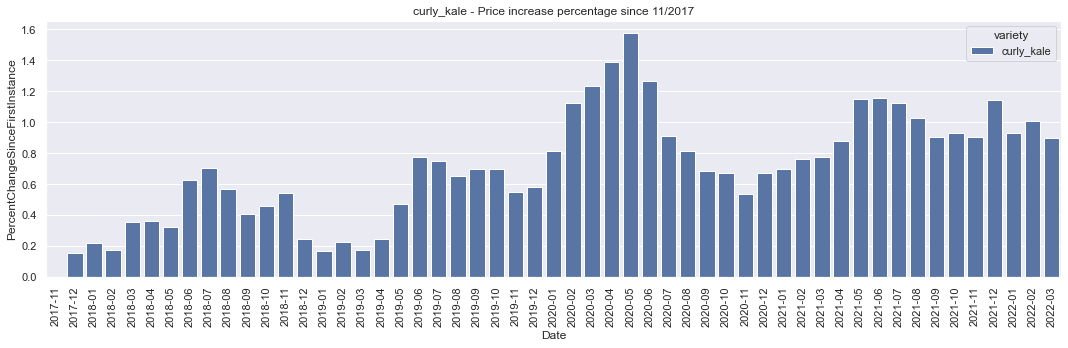



leeks


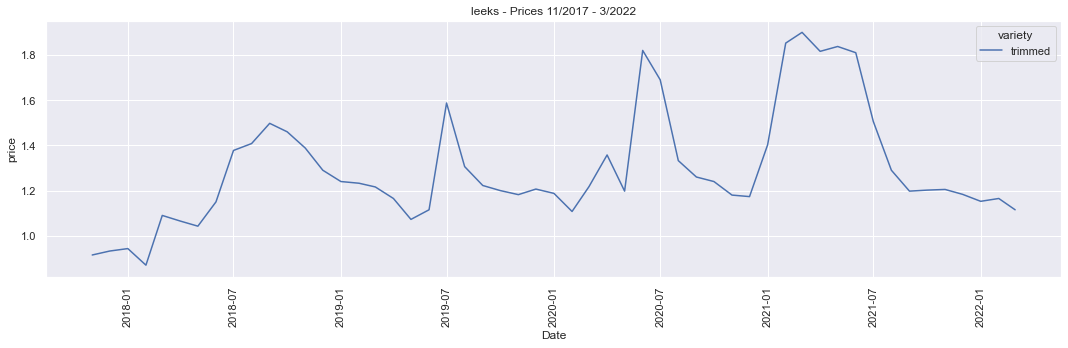

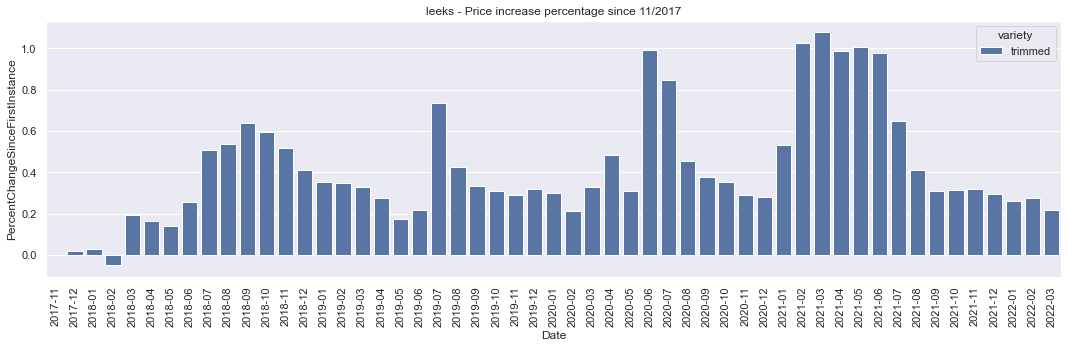



lettuce


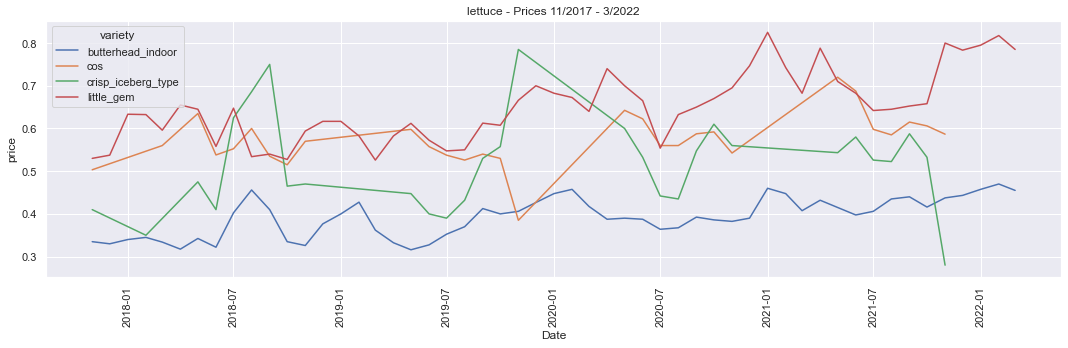

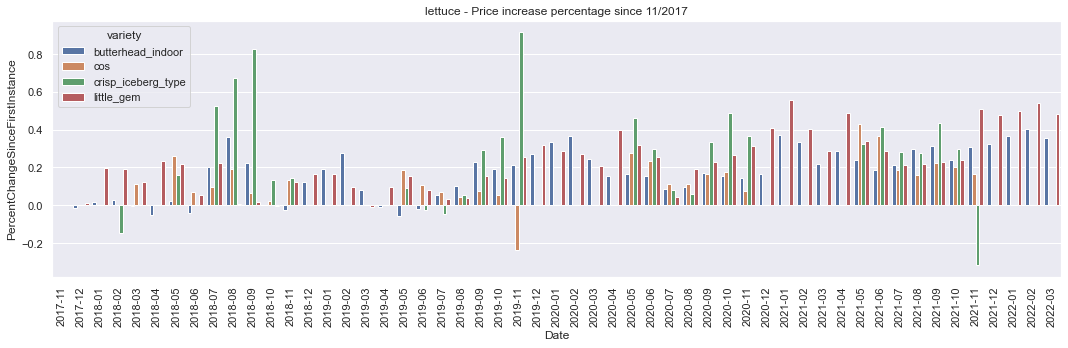



mixed_babyleaf_salad


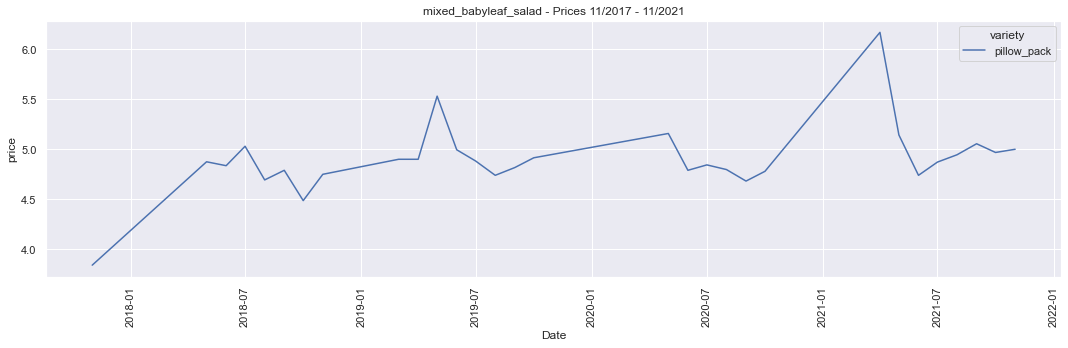

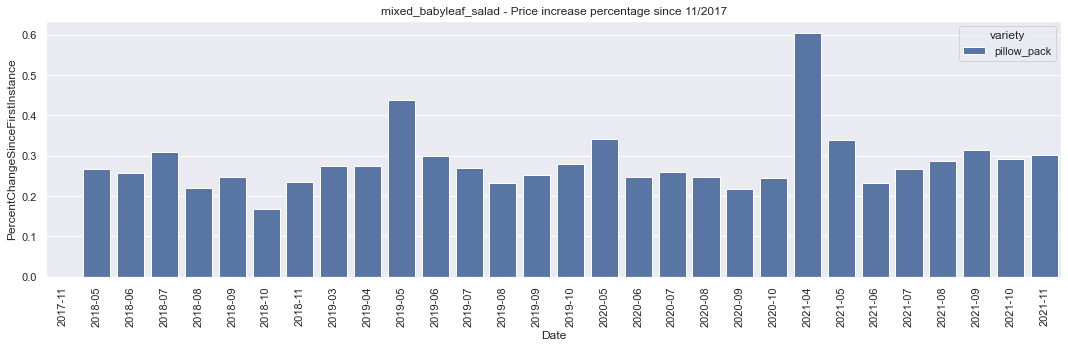



onion


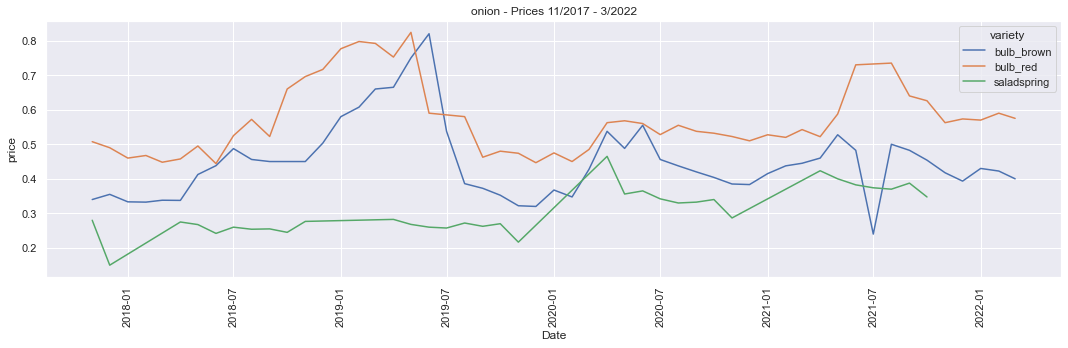

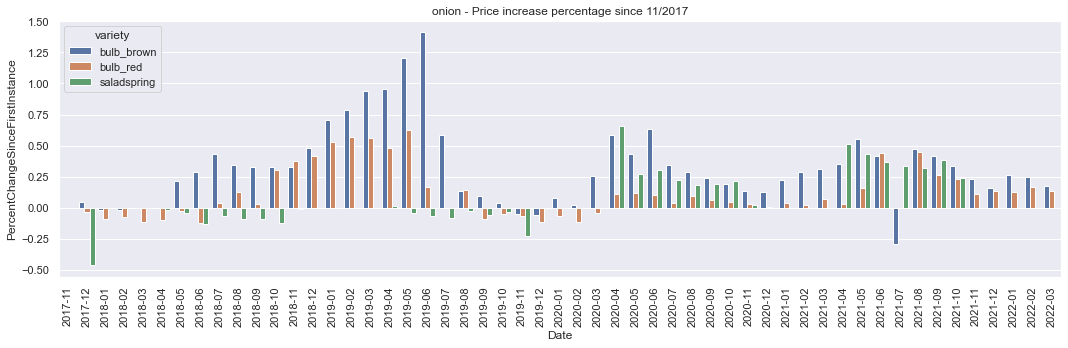



pak_choi


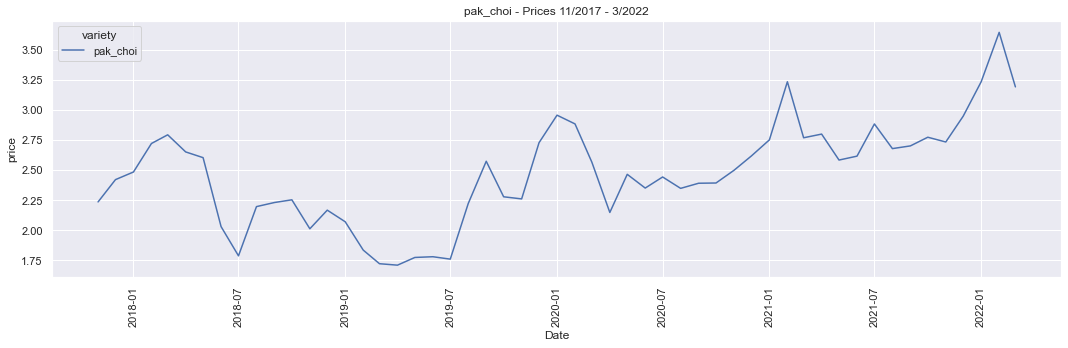

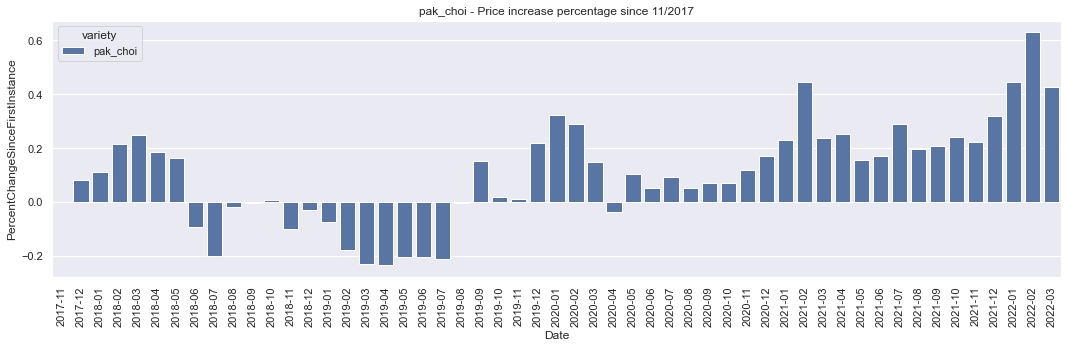



parsnips


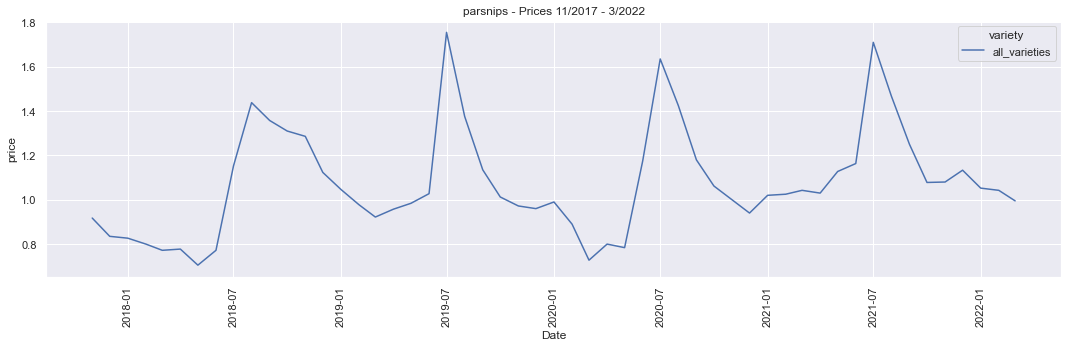

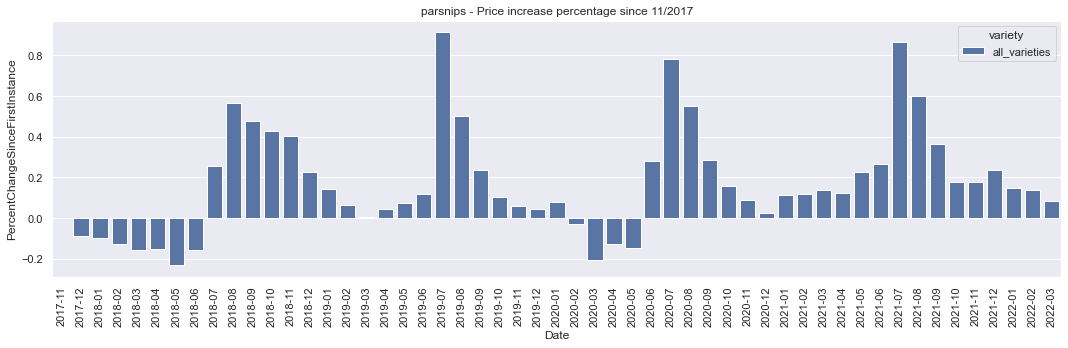



rocket


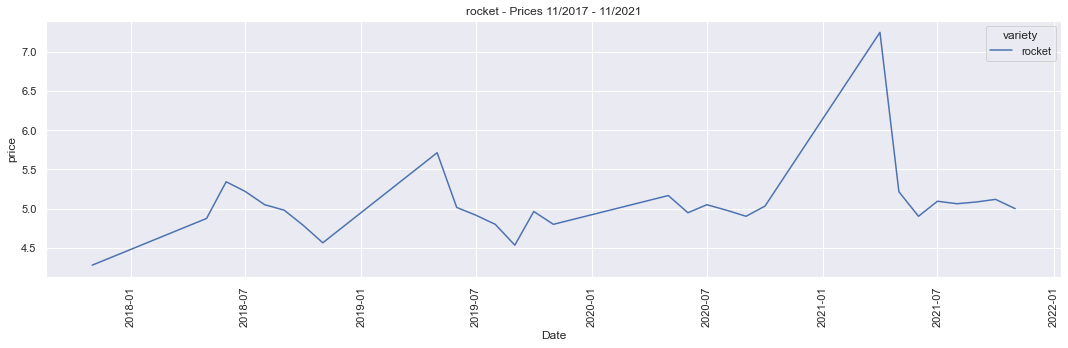

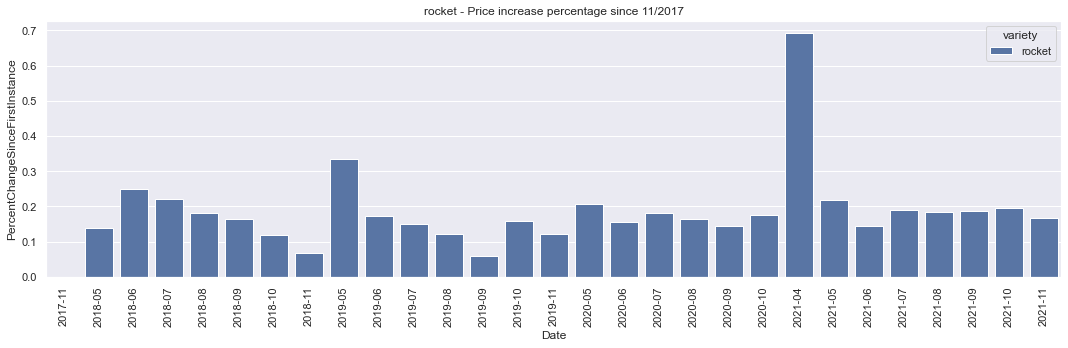



spinach_leaf


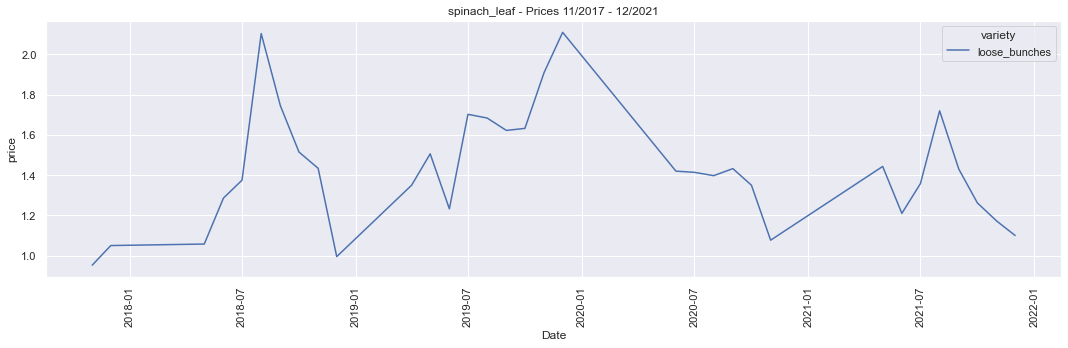

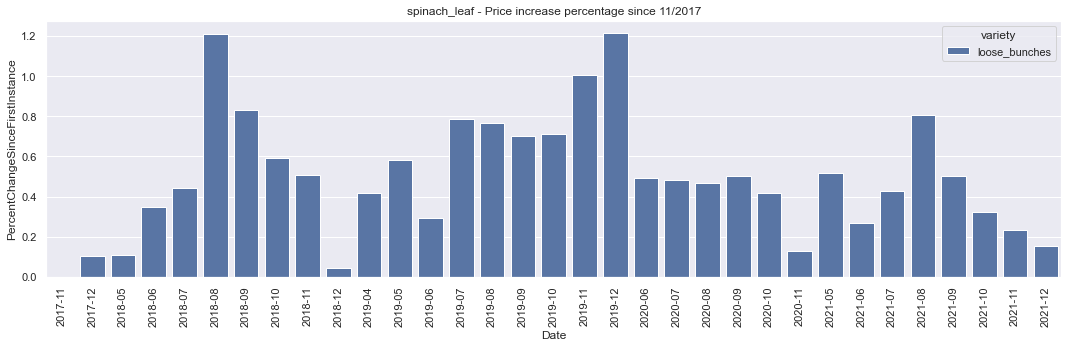



spring_greens


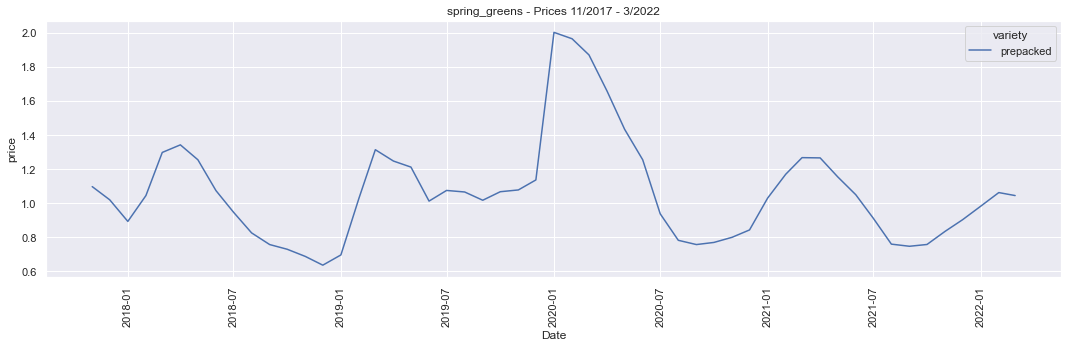

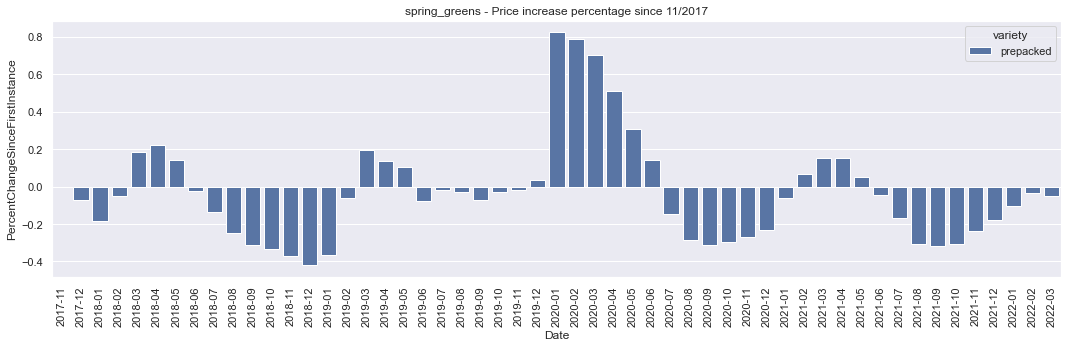



swede


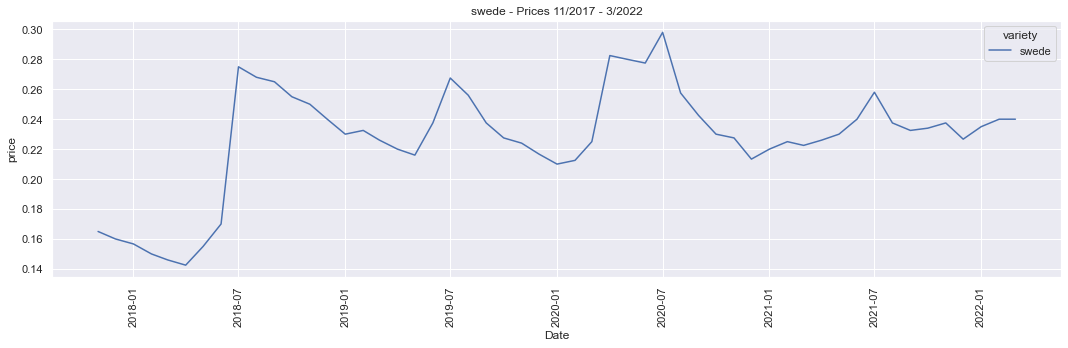

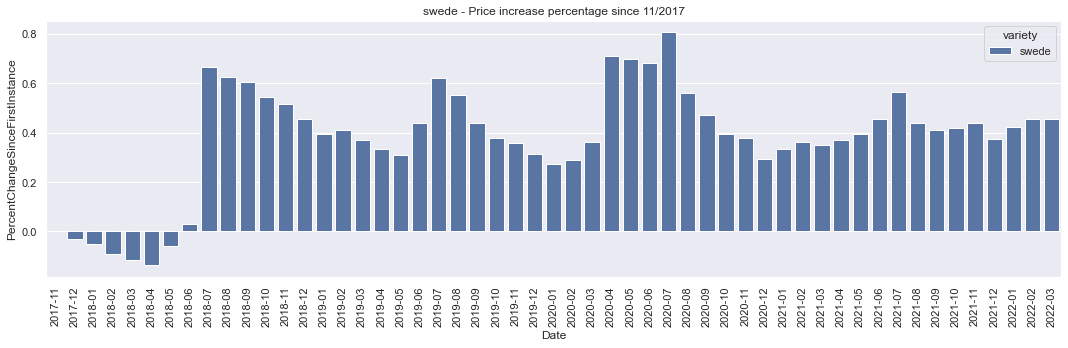



sweetcorn


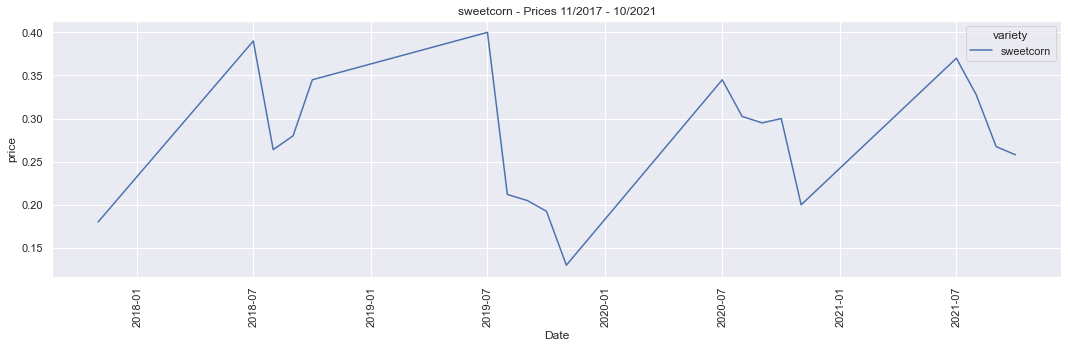

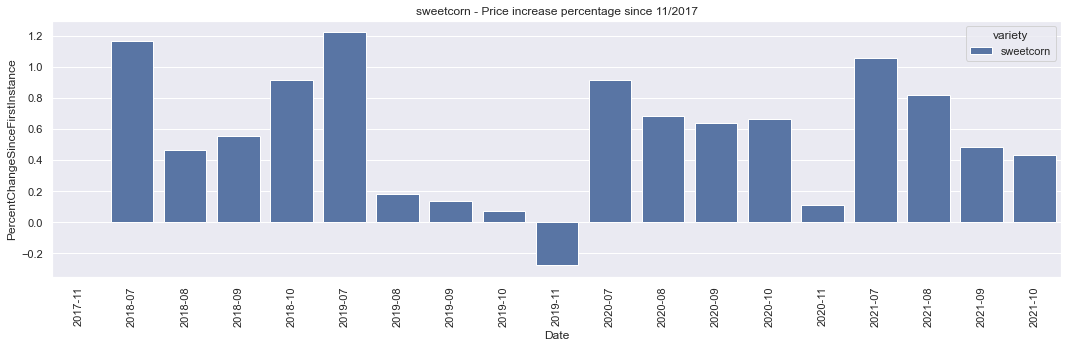



tomatoes


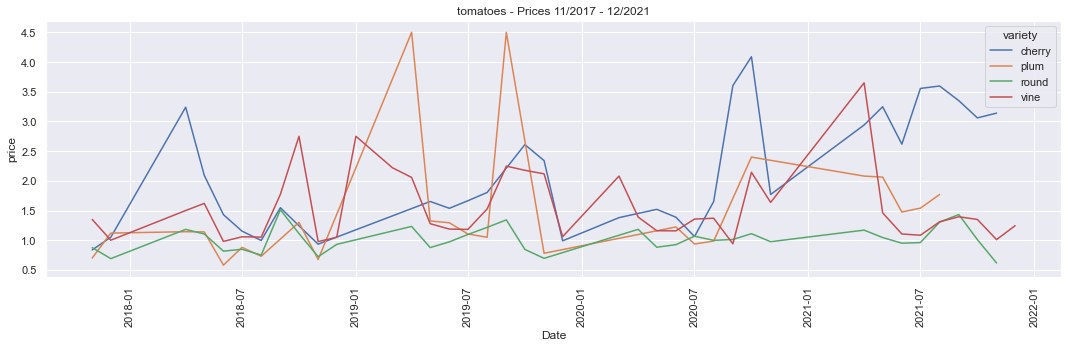

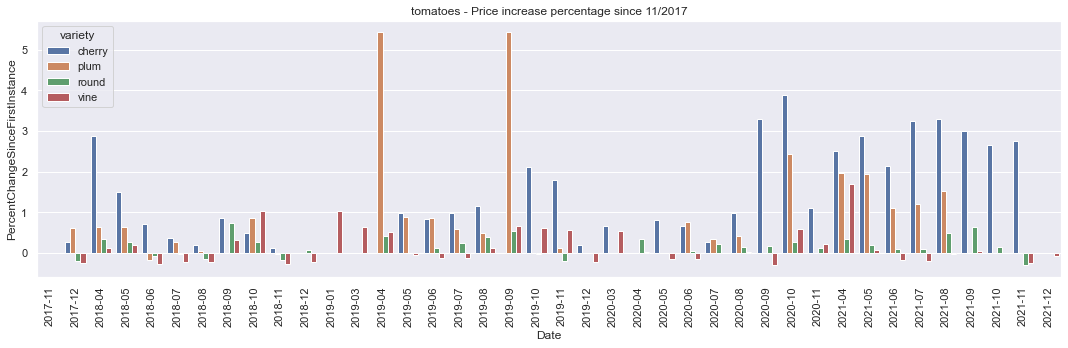



turnip


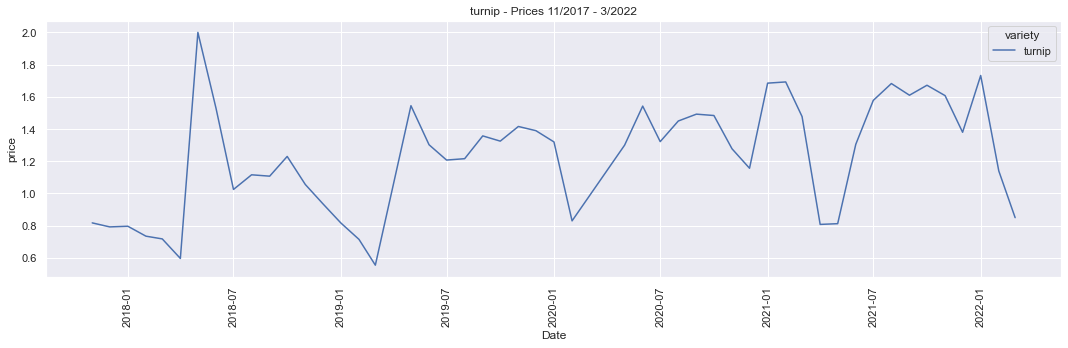

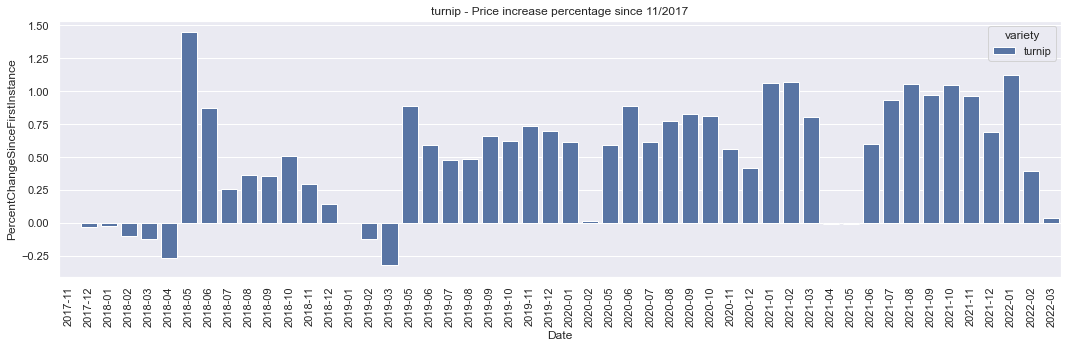



watercress


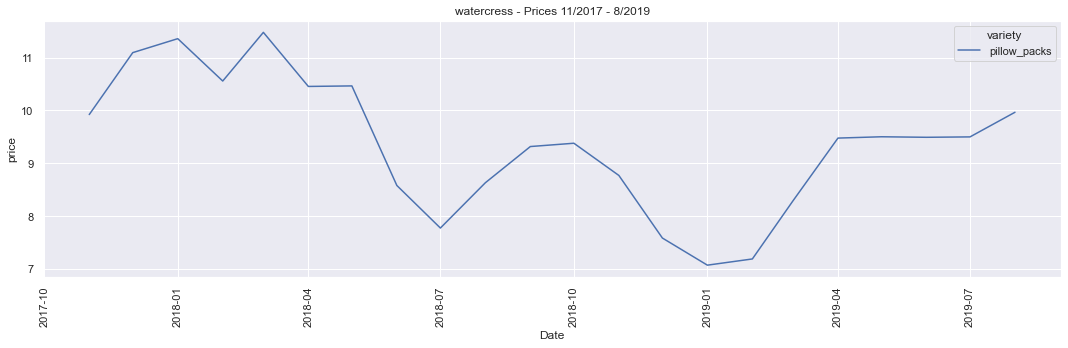

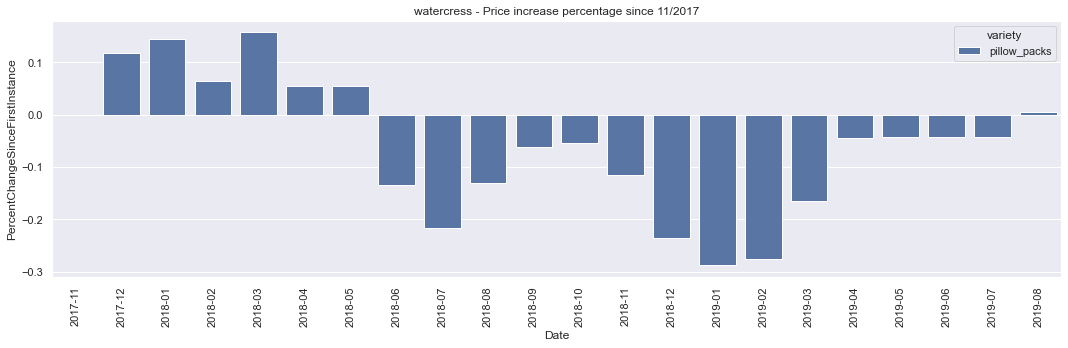



tulips


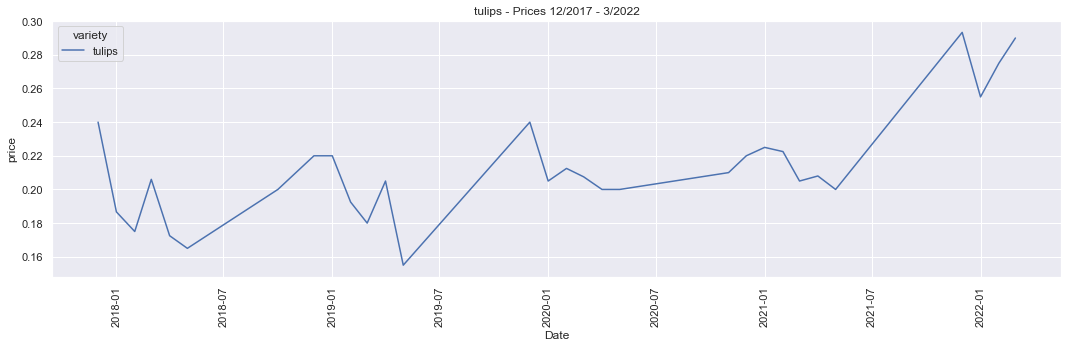

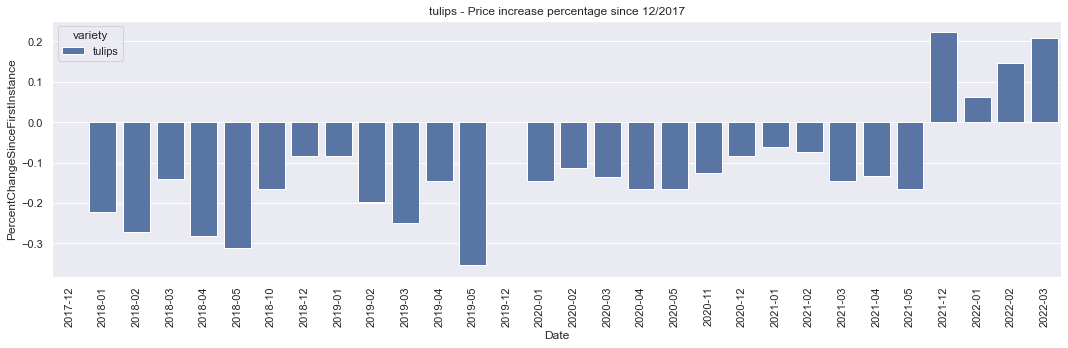



poinsettia


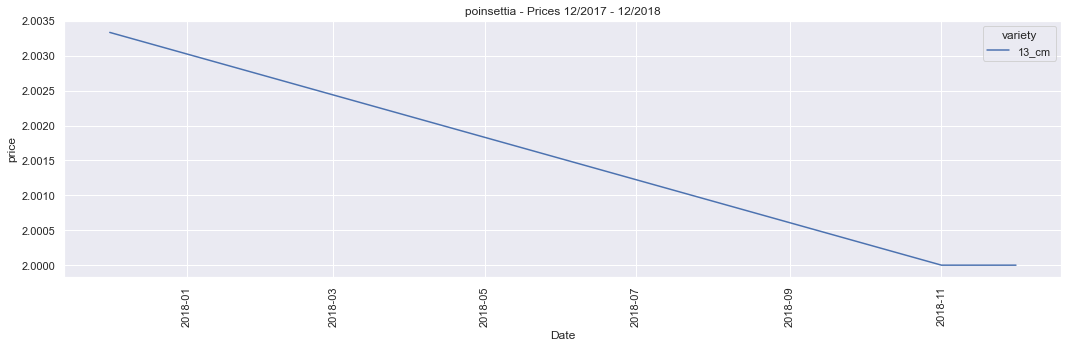

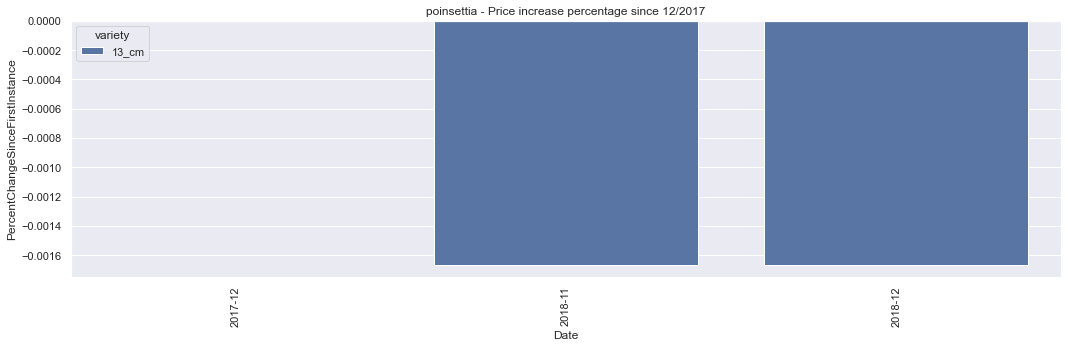



rhubarb


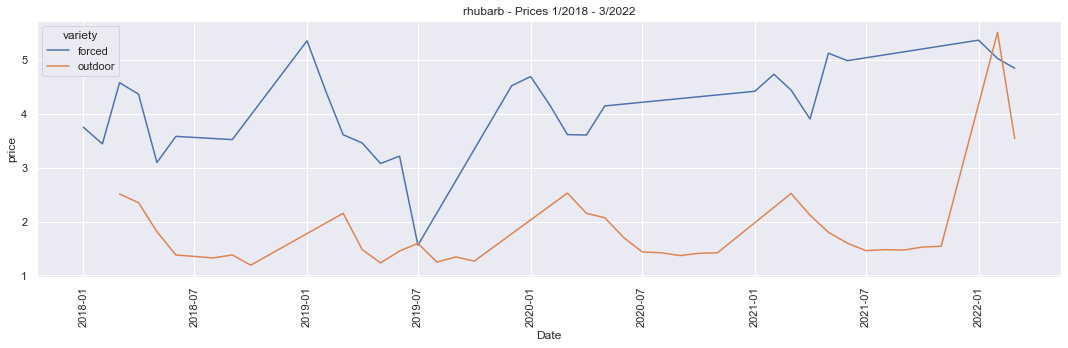

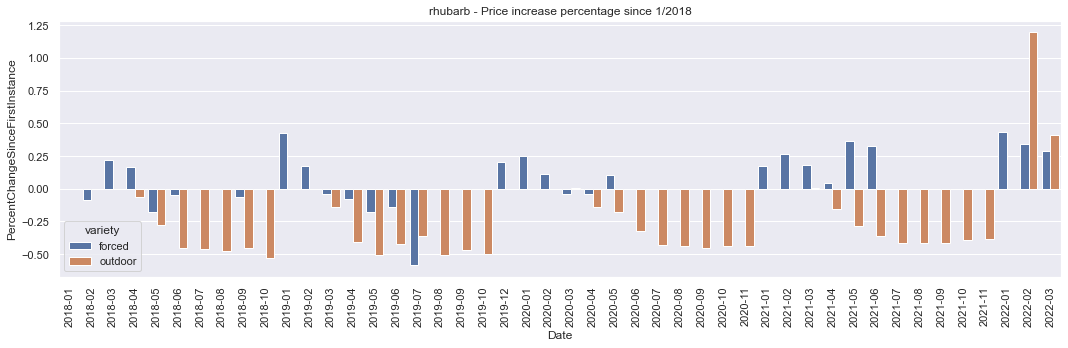



asparagus


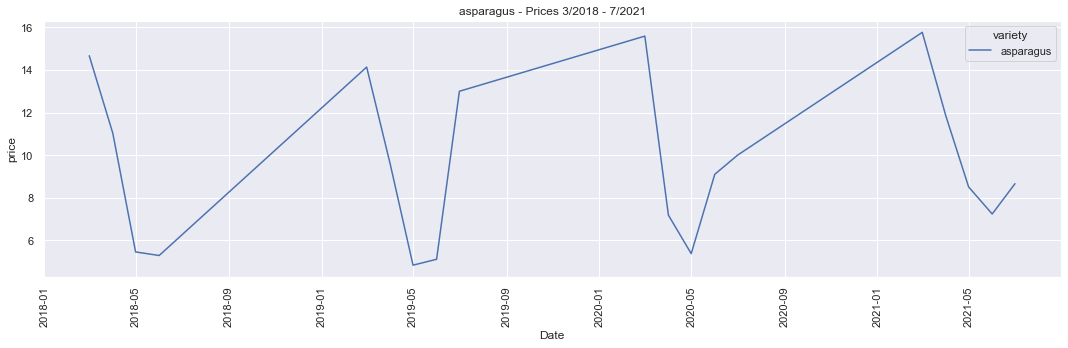

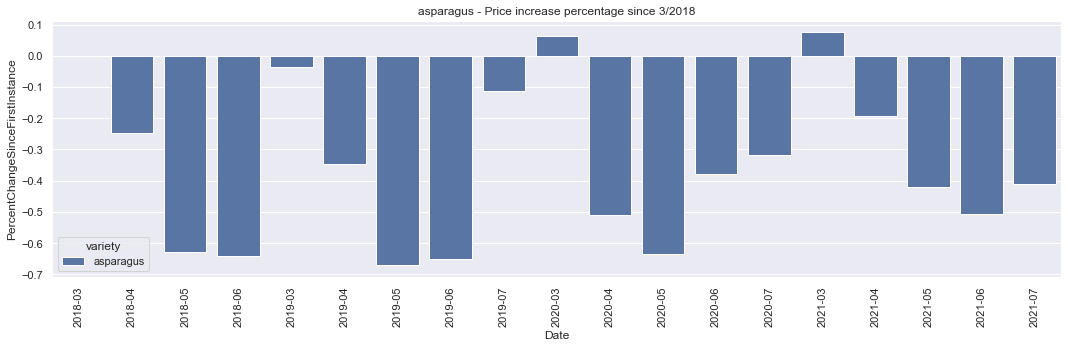



geranium


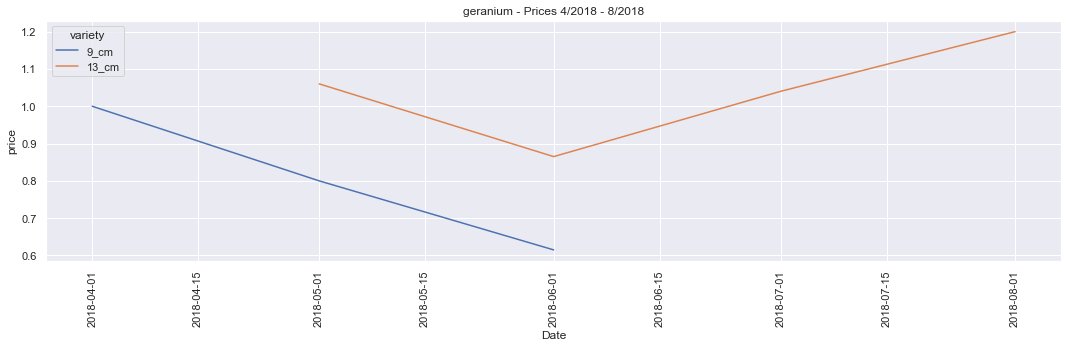

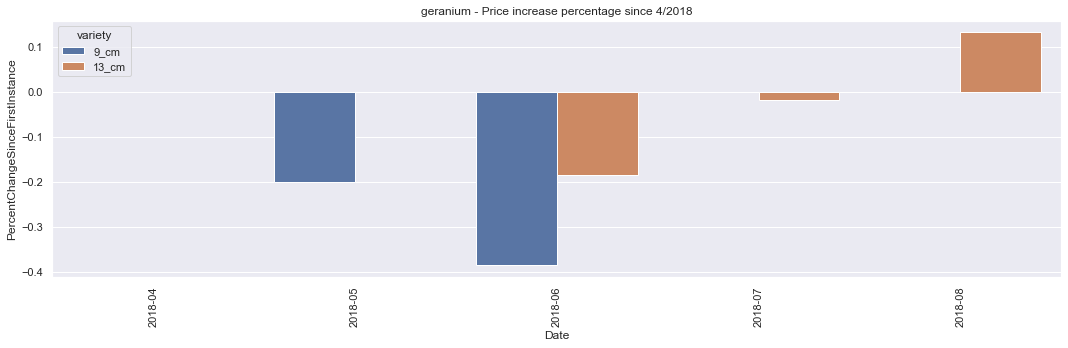



peony


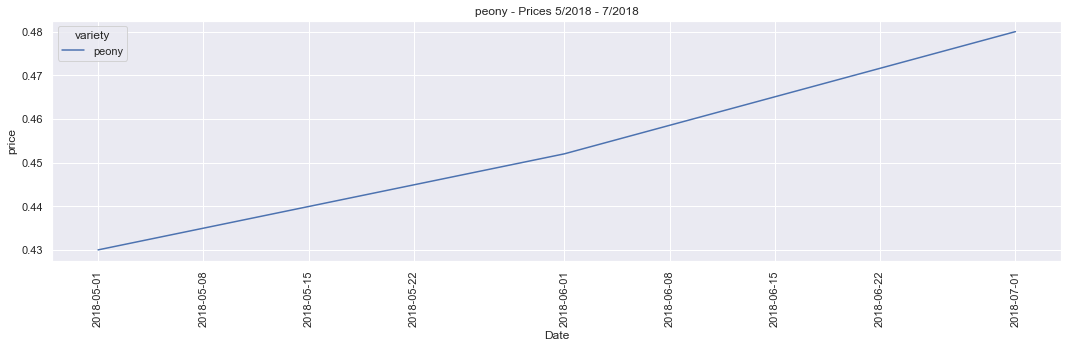

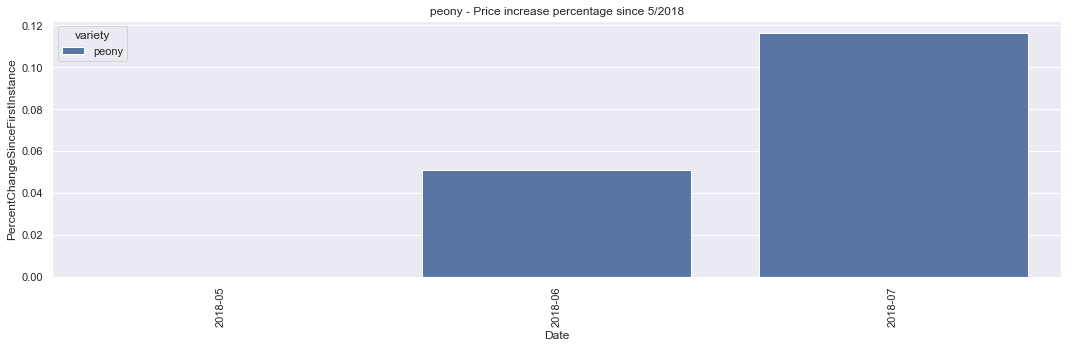



gladioli


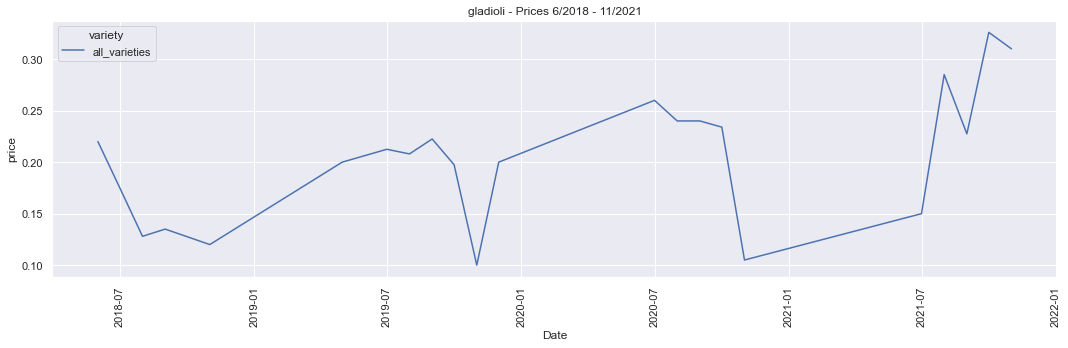

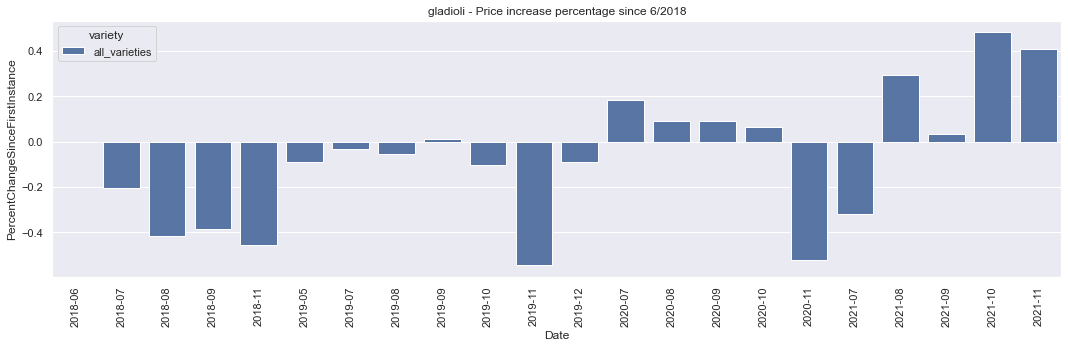



sweet_williams


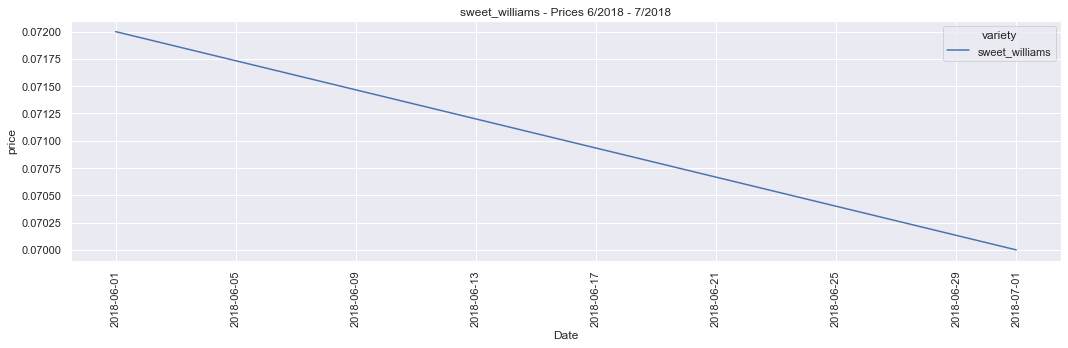

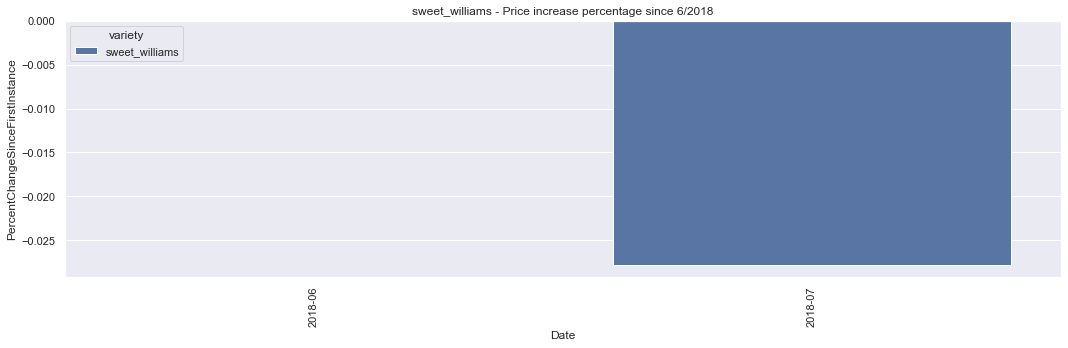



blueberries


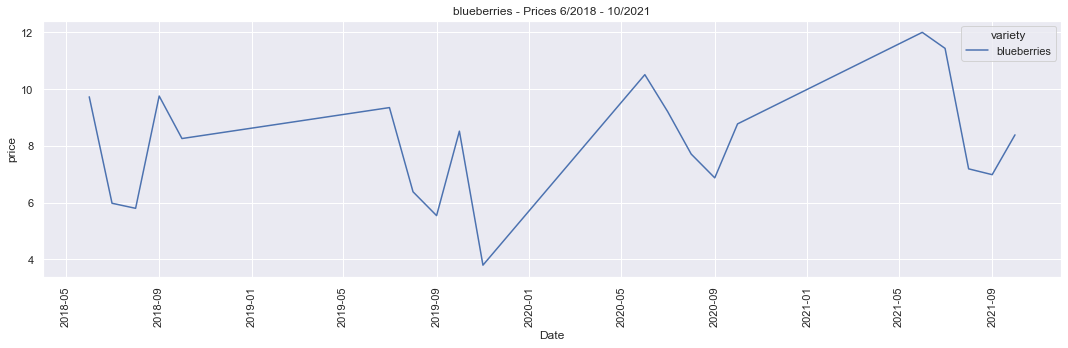

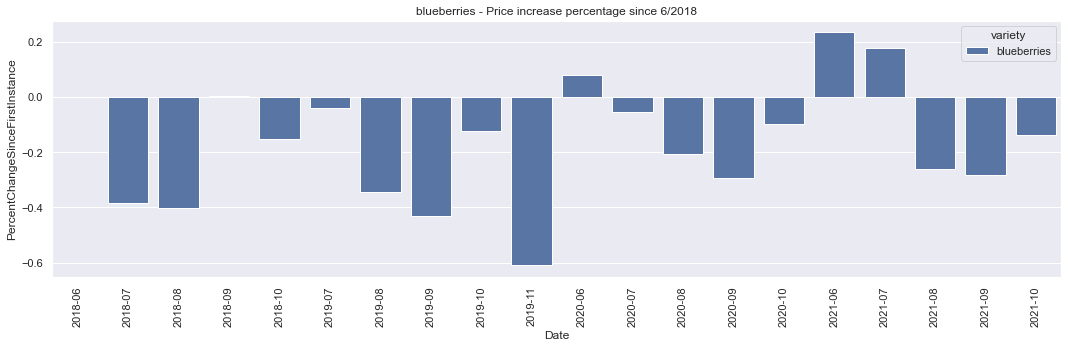



cherries


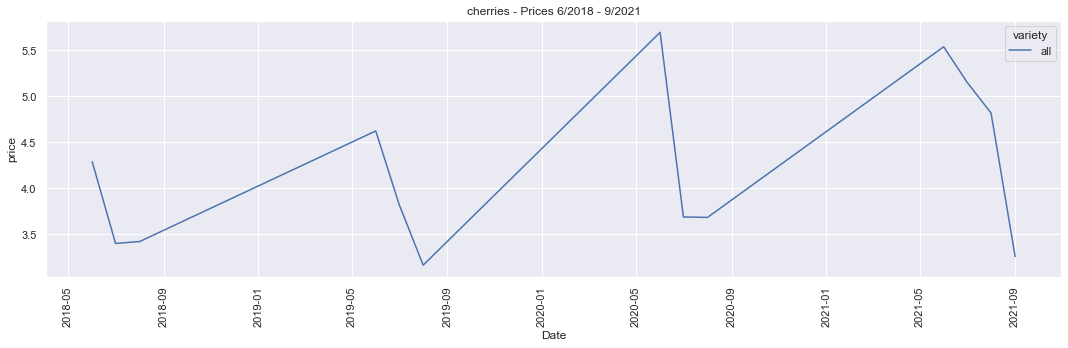

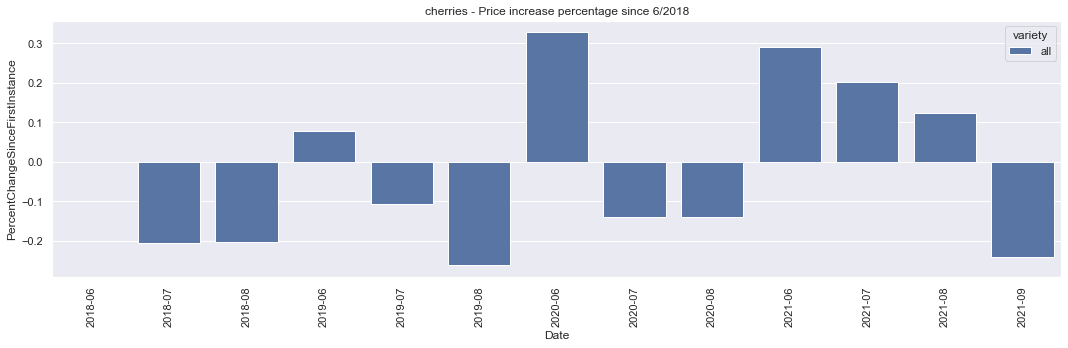



gooseberries


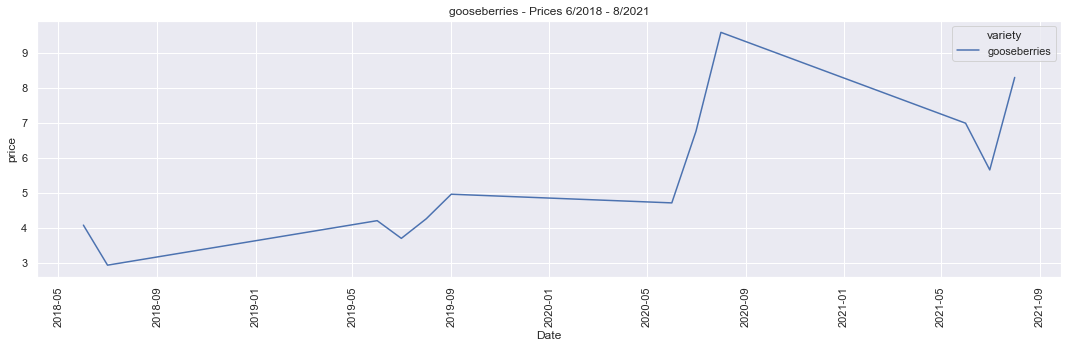

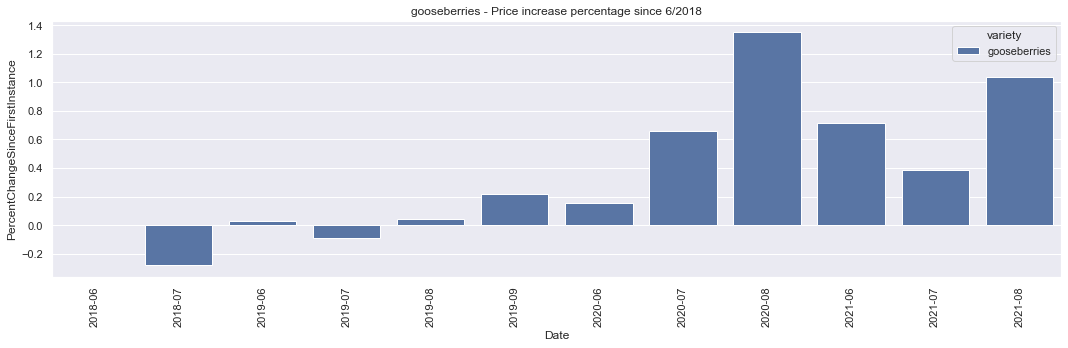



beans


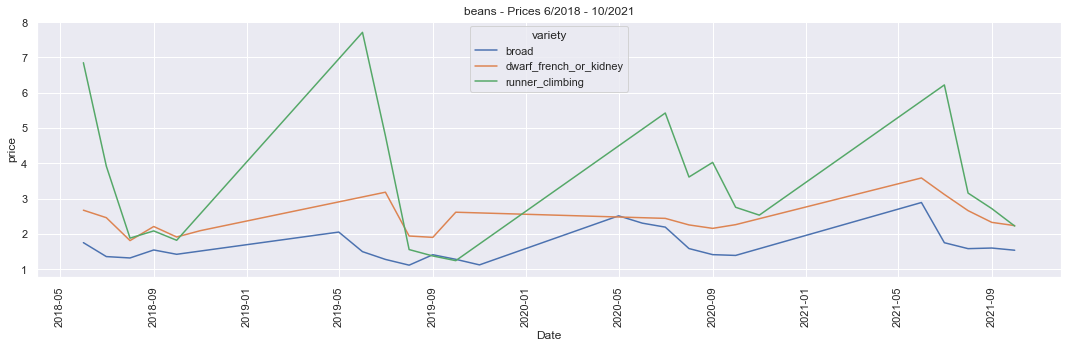

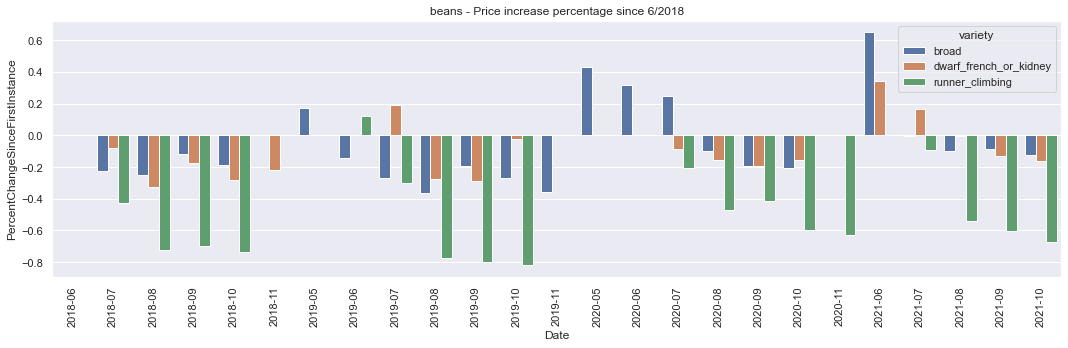



peas


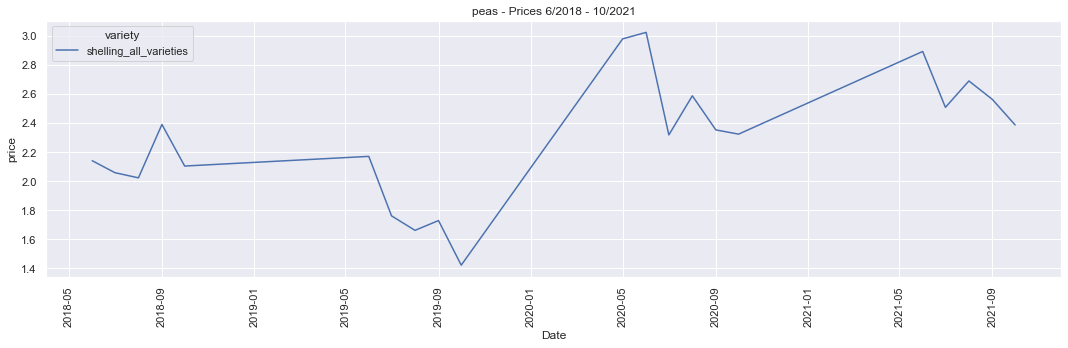

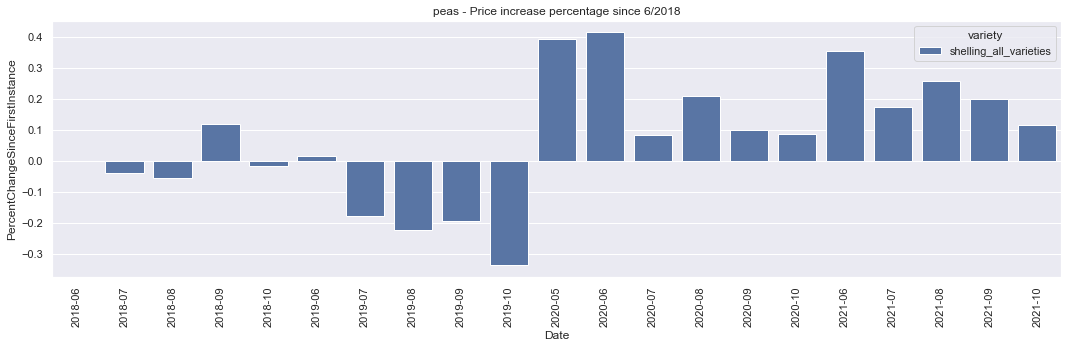



blackberries


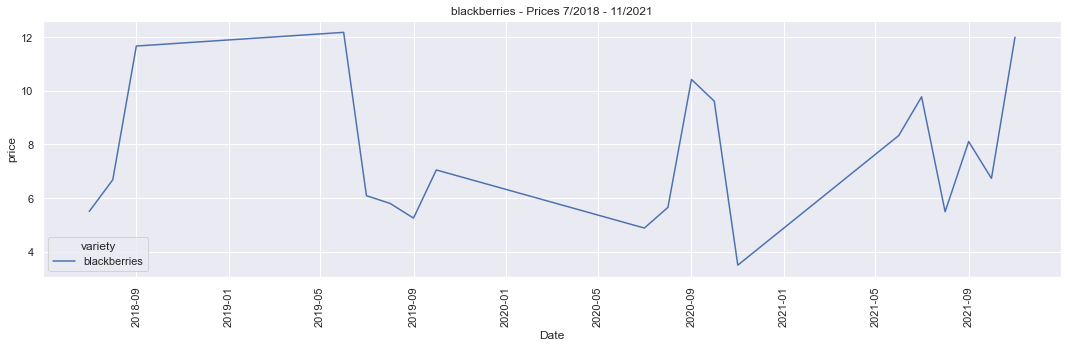

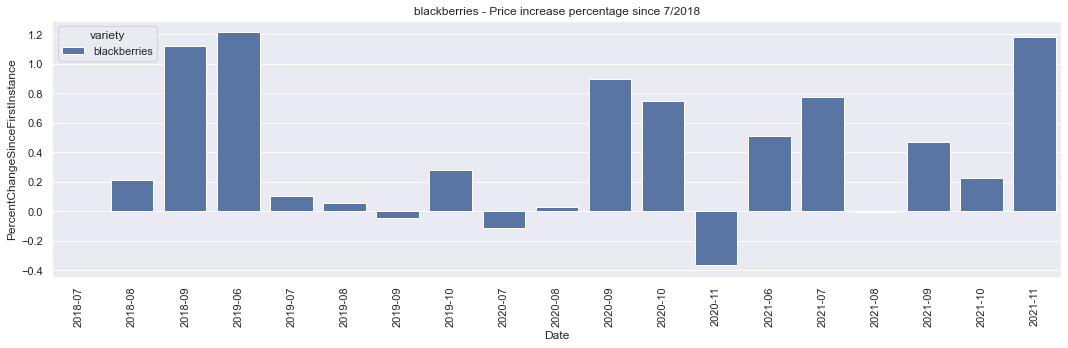



currants


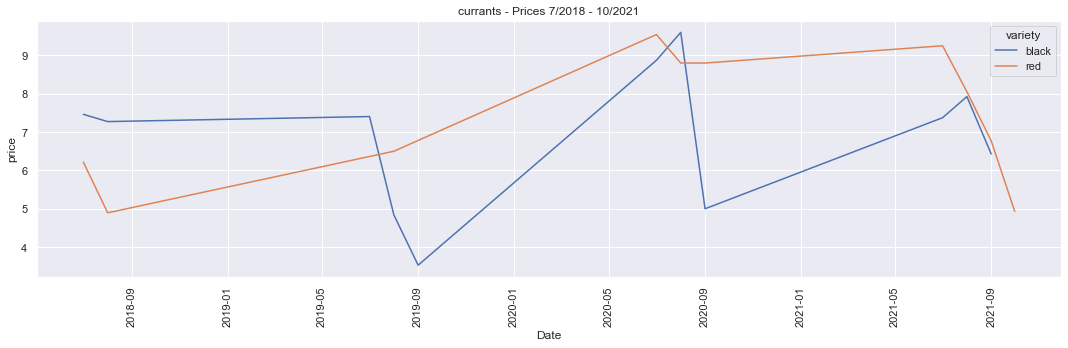

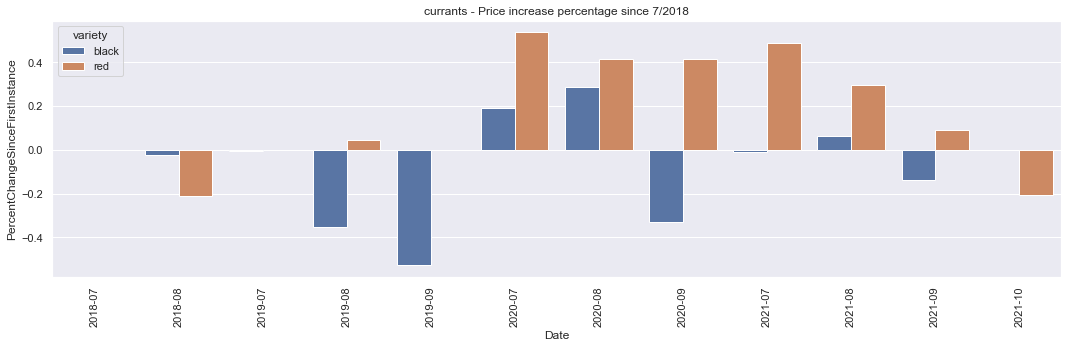



plums


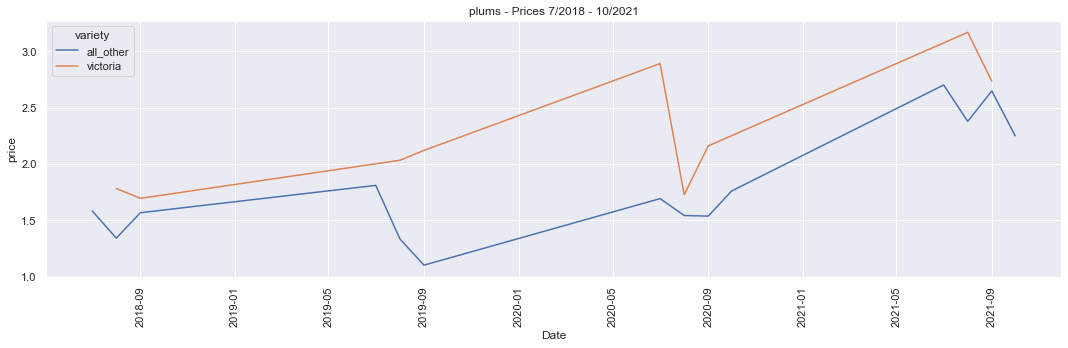

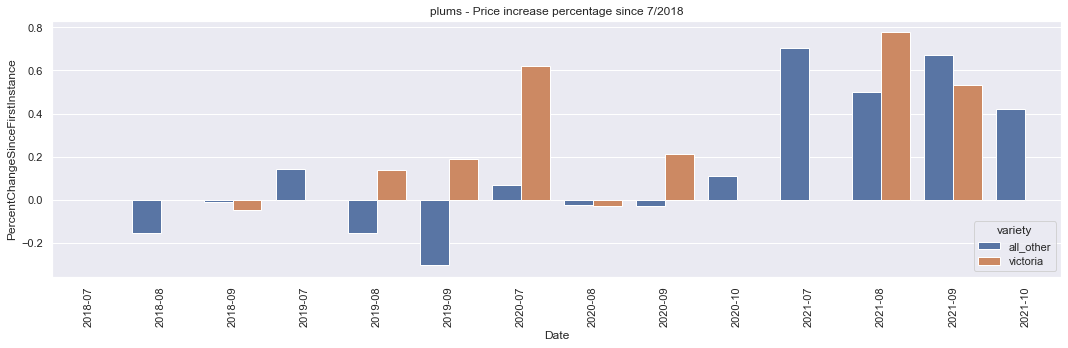



chinese_leaf


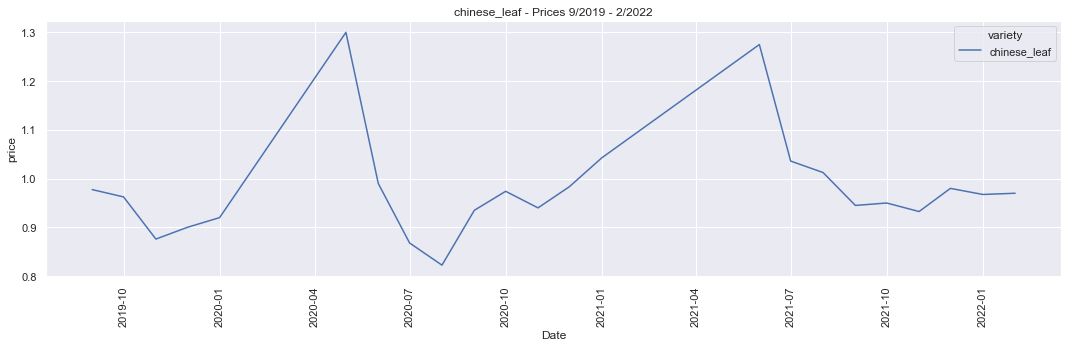

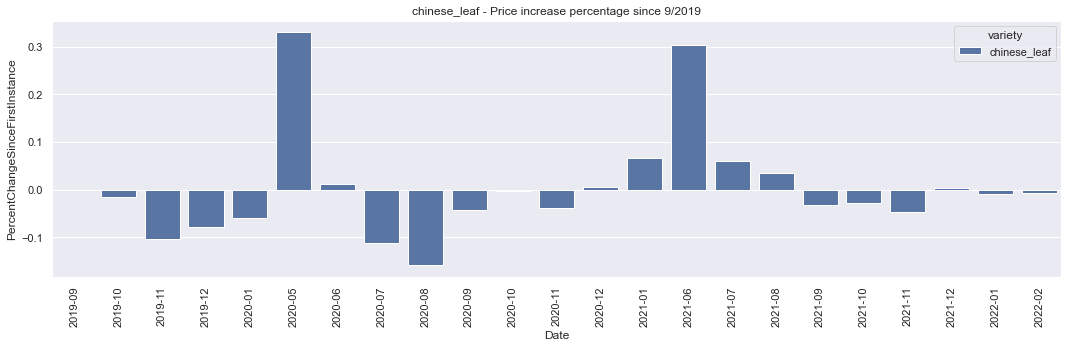

In [341]:
for i in ungrouped['item'].unique():
    x1 = ungrouped[ungrouped['item']==i][['Date','variety','price','Year','Month']]
    
    print()
    print()
    print(i)
    fig, (ax1) = plt.subplots(1, 1, figsize=(15, 5))
    s1 = sns.lineplot(ax = ax1,data = x1, x = 'Date', y='price', hue='variety')
    ax1.tick_params(axis="x", labelrotation=90)
    ax1.set_title("{0} - Prices {1}/{2} - {3}/{4}".format(i, 
                                                          x1[x1['Year']==x1['Year'].min()]['Month'].min(),  
                                                          x1['Year'].min(),
                                                          x1[x1['Year']==x1['Year'].max()]['Month'].max(),
                                                          x1['Year'].max()))
    plt.tight_layout()
    plt.show()
    
    fig, (ax2) = plt.subplots(1, 1, figsize=(15, 5))
    x2 = ungrouped[ungrouped['item']==i][['Date','variety','PercentChangeSinceFirstInstance','Year','Month']]
    s2 = sns.barplot(ax= ax2,data=x2, x='Date', y = 'PercentChangeSinceFirstInstance', hue='variety')
    ax2.tick_params(axis="x", labelrotation=90)
    ax2.set_title("{0} - Price increase percentage since {1}/{2}".format(i, 
                                                                         x2[x2['Year']==x2['Year'].min()]['Month'].min(),  
                                                                         x2['Year'].min()))
    

    ax2.set_xticklabels([str(s).split(',')[2].split('T')[0][2:9] for s in ax2.get_xticklabels()])
    
    plt.tight_layout()
    plt.show()
        
    


In [235]:
data[(data['category']=='fruit')&(~data['Seasonal'])]['item'].value_counts()

apples      729
cherries     45
currants     28
Name: item, dtype: int64

In [251]:
inflationData = pd.read_csv('./AnnualCPI.csv',';')
inflationData.head()
inflationData['Date'] = pd.to_datetime(inflationData['Date'])



g = inflationData[(inflationData['Date']<= data['date'].max()) & (inflationData['Date']>= data['date'].min())]
g.head()

C:\Users\Karl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


Date  CPIH  CPI  OOH
70 2017-12-01   2.7  3.0  1.3
71 2018-01-01   2.7  3.0  1.2
72 2018-02-01   2.5  2.7  1.2
73 2018-03-01   2.3  2.5  1.2
74 2018-04-01   2.2  2.4  1.2

<AxesSubplot:xlabel='Date', ylabel='CPI'>

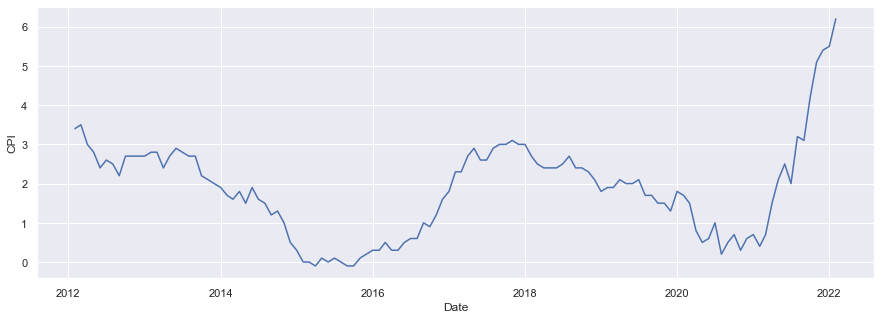

In [343]:
fig, (ax2) = plt.subplots(1, 1, figsize=(15, 5))

inflateTime = inflationData[(inflationData['Date']<= data['date'].max())]
sns.lineplot(ax =ax2,data= inflateTime, x='Date', y='CPI')

In [281]:
apple =ungrouped[(ungrouped['item']=='apples') & (ungrouped['variety']=='braeburn')]
appleDrop = apple.dropna()

most = appleDrop['Month'].value_counts().keys()[0]
firstDate =apple[apple['Month']==most].iloc[0]['Date']

y = list(inflationData[inflationData['Date']==firstDate]['CPI'])[0]
apple[apple['Month']==most]['ratioToFirstRecord']*y

6       3.100000
643     3.513333
1248    4.311818
1828    3.921970
2399    5.119697
Name: ratioToFirstRecord, dtype: float64

In [365]:
predictedCPI = []



for i in ungrouped['item'].unique():
    for v in ungrouped[ungrouped['item']==i]['variety'].unique():
        
        
        records = ungrouped[(ungrouped['item']==i) & (ungrouped['variety']==v)]
        dropped = records.dropna()
        
        mostFreqMonths = list(dropped['Month'].value_counts().keys())
        if(len(mostFreqMonths)==0):
            continue
        
        mostFreqMonth = mostFreqMonths[0]
        first =records[records['Month']==mostFreqMonth].iloc[0]
        
        firstCPI = list(inflationData[inflationData['Date']==first['Date']]['CPI'])[0]
        
        
        
        for index, row in records[records['Month']==mostFreqMonth].iterrows():
            thisdict={}
            thisdict['Date'] = row['Date']
            thisdict['category'] = row['category']
            thisdict['item'] = row['item']
            thisdict['variety'] = row['variety']
            thisdict['spec'] = row['item']+' - '+row['variety']
            thisdict['predictedCPI'] = row['price']/first['price']*firstCPI
            predictedCPI.append(thisdict)
            
predictedCPIDF = pd.DataFrame(predictedCPI)


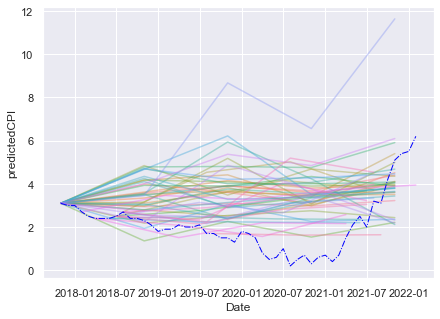

In [374]:
predictedCPIDF.head()

fig, (ax2) = plt.subplots(1, 1, figsize=(7, 5))
g = sns.lineplot(ax =ax2,data = predictedCPIDF[predictedCPIDF['category']=='vegetable'][['Date','spec','predictedCPI']], x='Date', y='predictedCPI', hue='spec',alpha  = 0.4)
inf = inflationData[inflationData['Date']>=predictedCPIDF['Date'].min()]

plt.legend([],[], frameon=False)
plt.plot(inf['Date'],inf['CPI'], color = 'blue', linewidth=1, linestyle='-.',label="CPI")
#leg = plt.legend(loc='upper left', bbox_to_anchor=(1, 1))



alstromeria


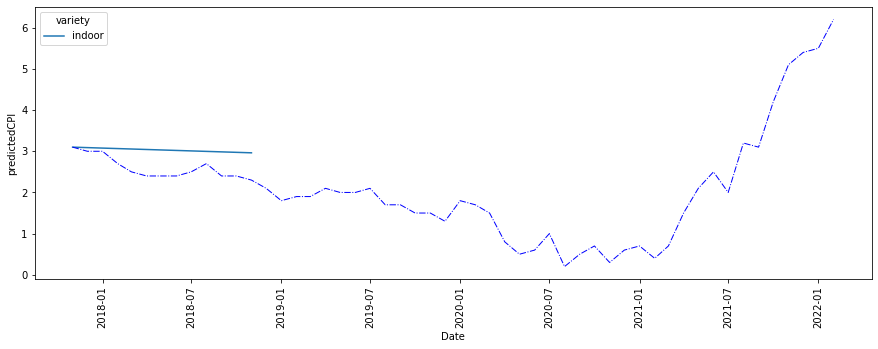



chrysanthemum


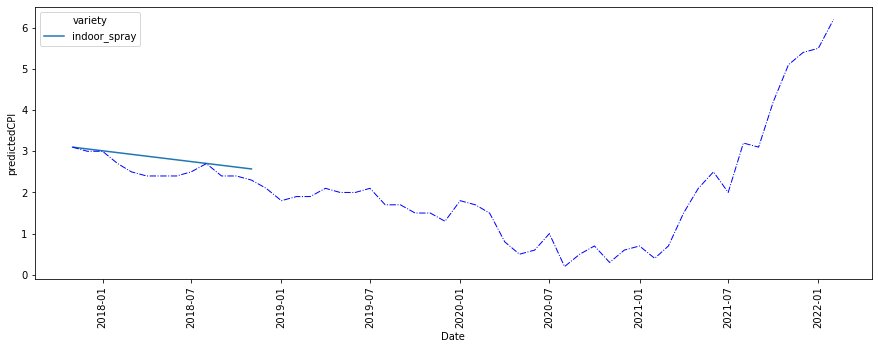



lillies


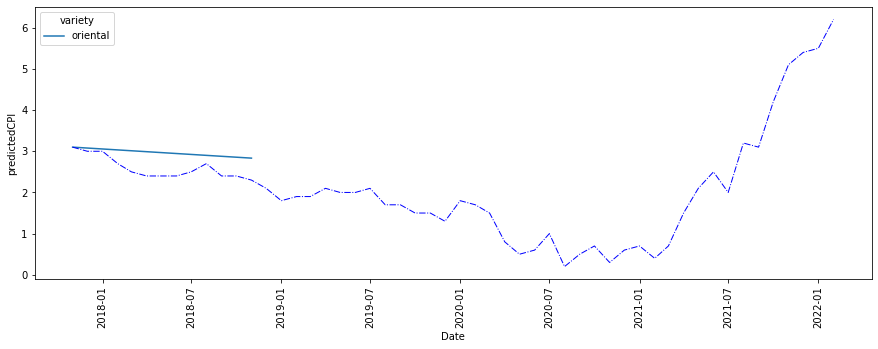



narcissus


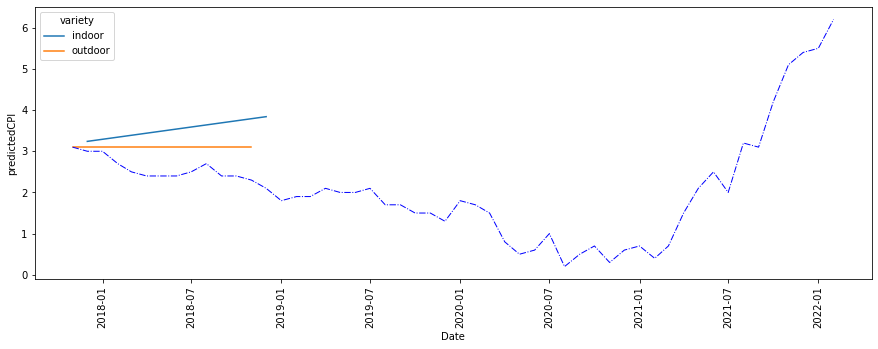



apples


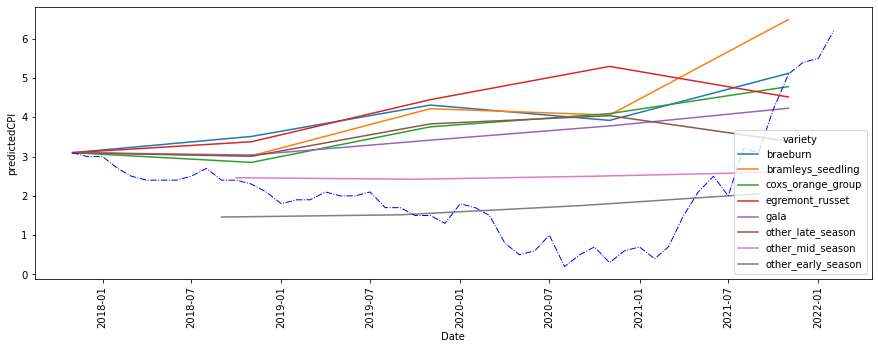



pears


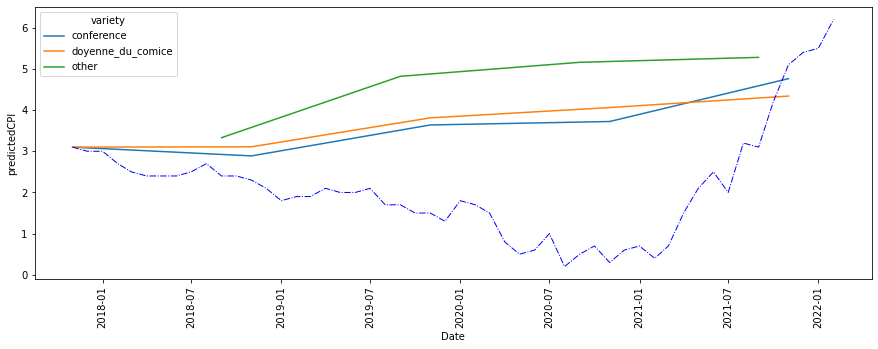



raspberries


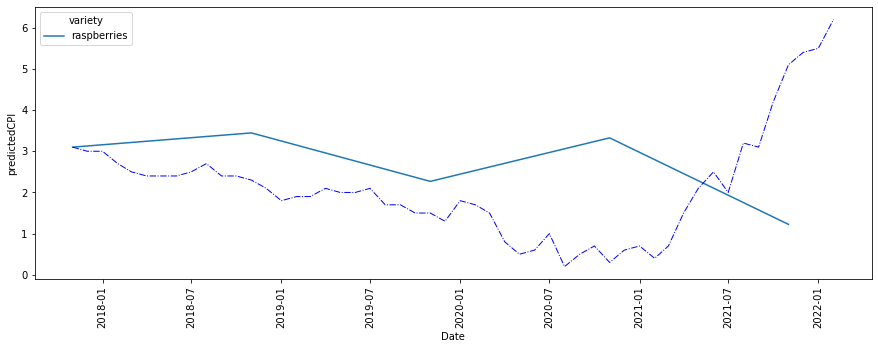



strawberries


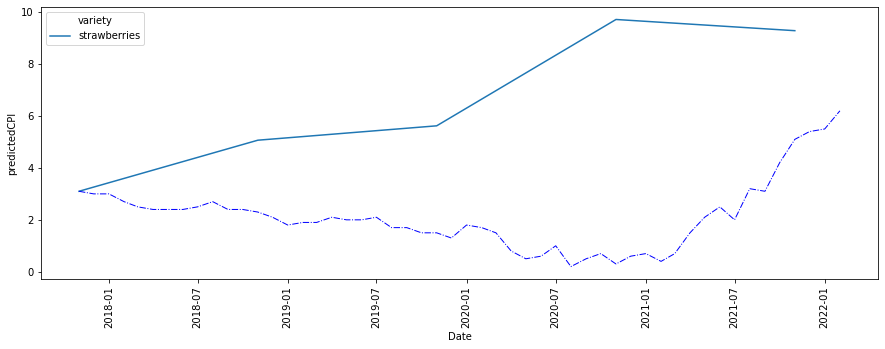



cyclamen


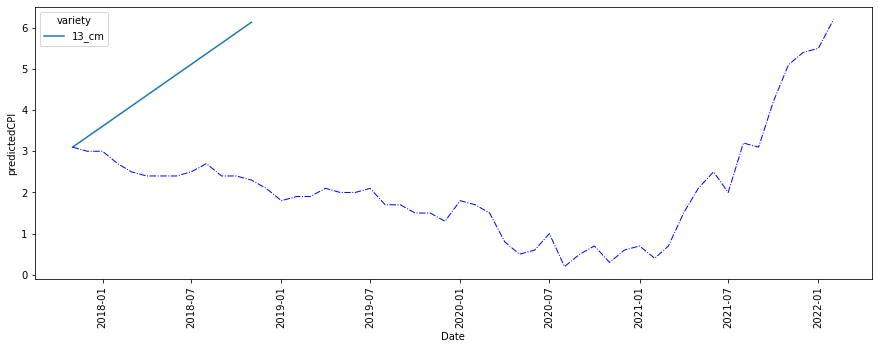



beetroot


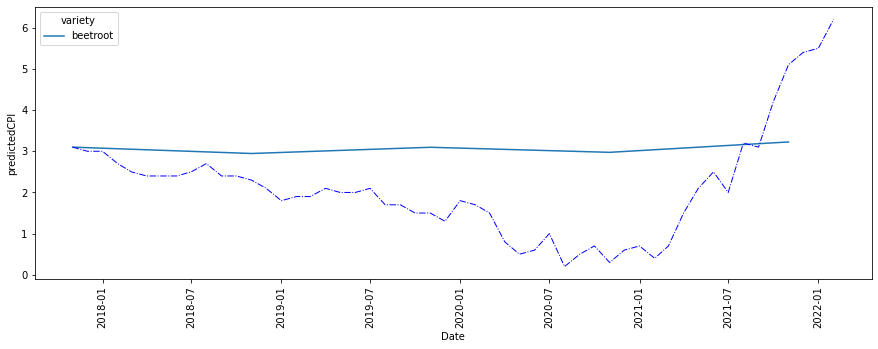



brussels_sprouts


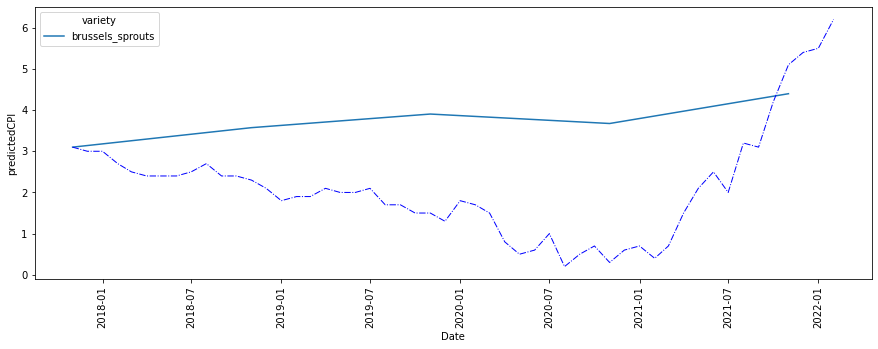



cabbage


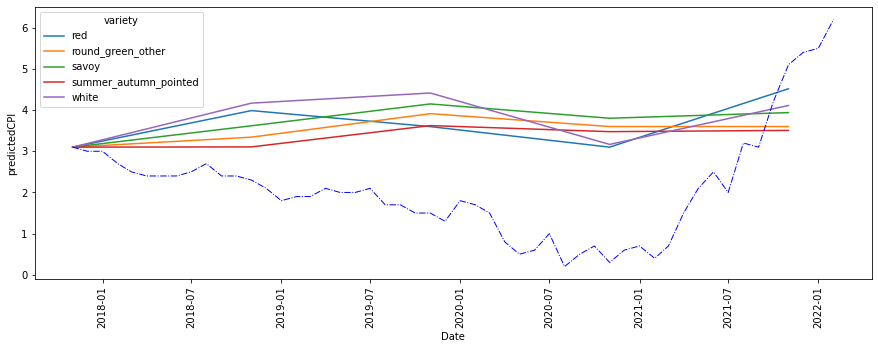



calabrese


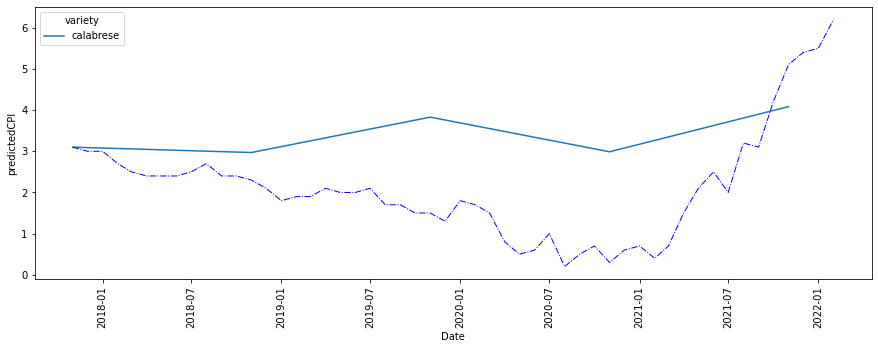



capsicum


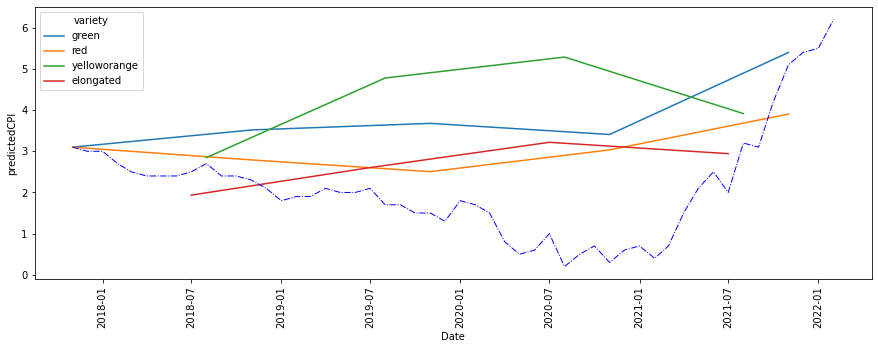



carrots


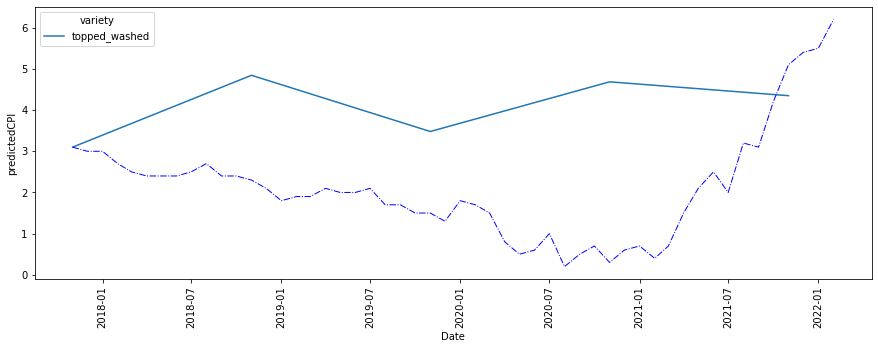



cauliflower


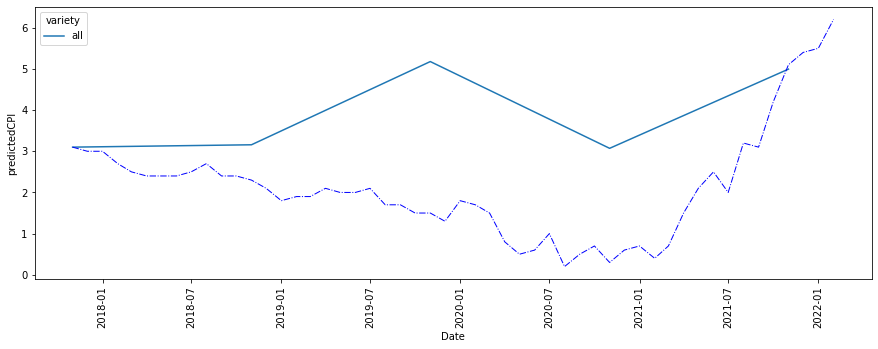



celeriac


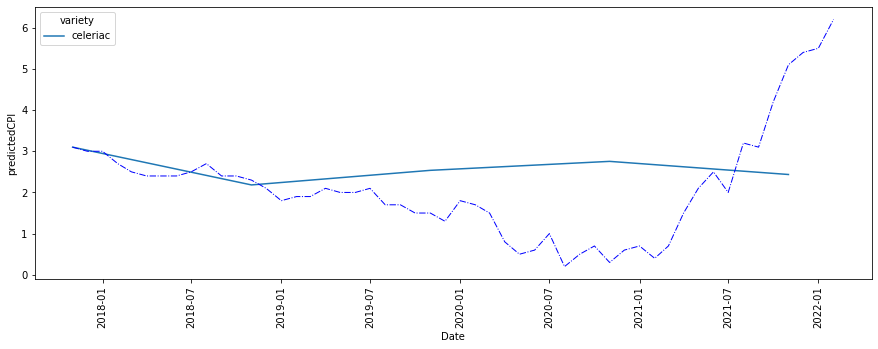



celery


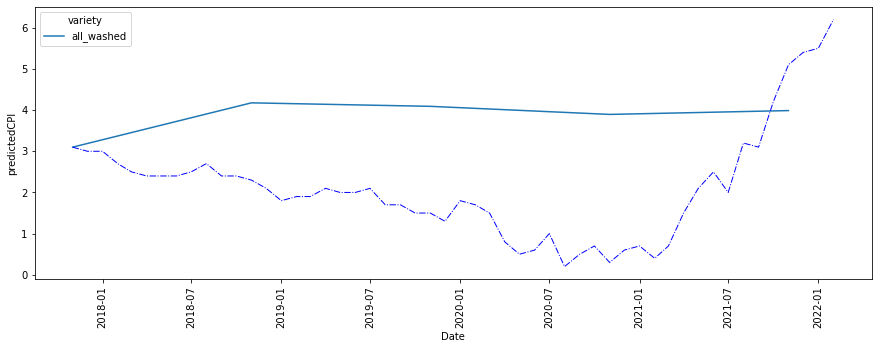



coriander


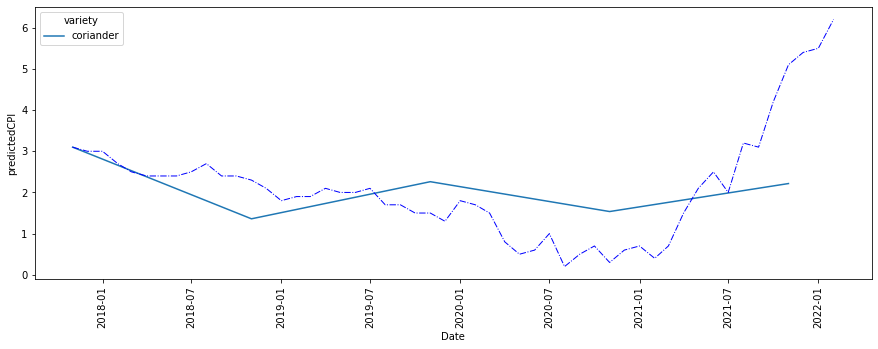



courgettes


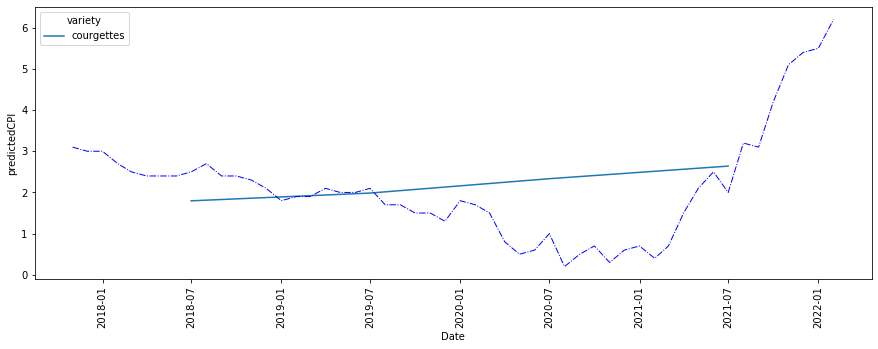



cucumbers


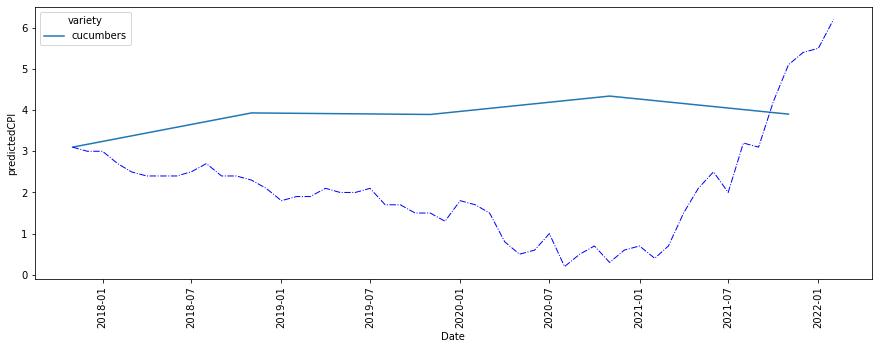



curly_kale


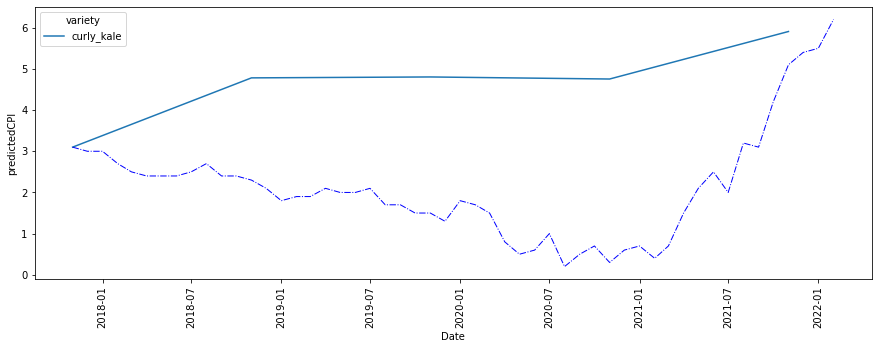



leeks


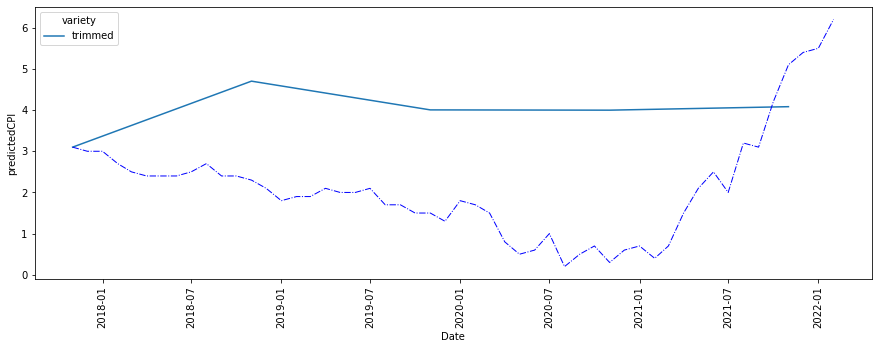



lettuce


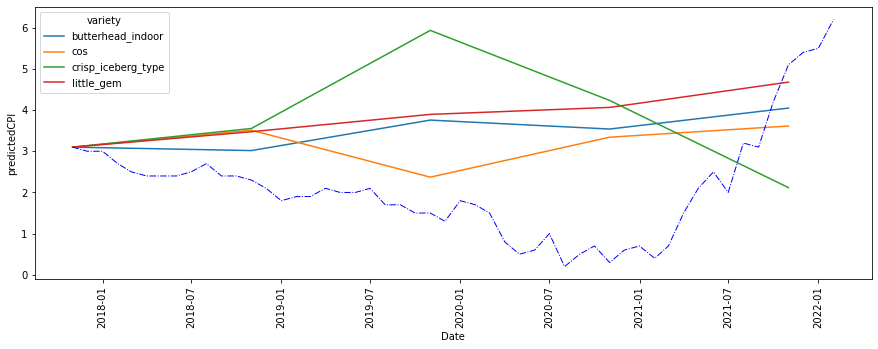



mixed_babyleaf_salad


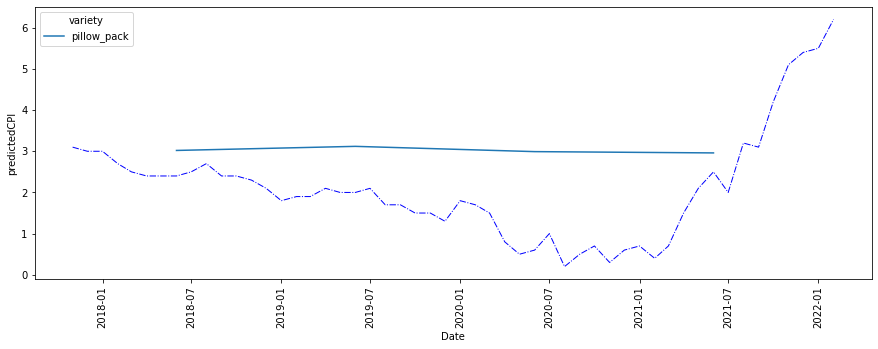



onion


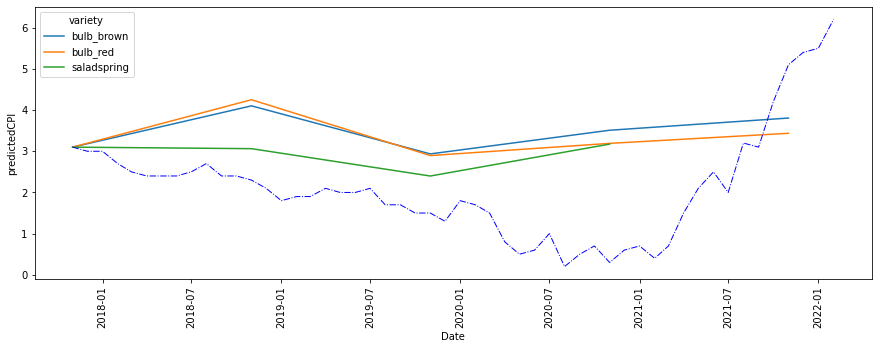



pak_choi


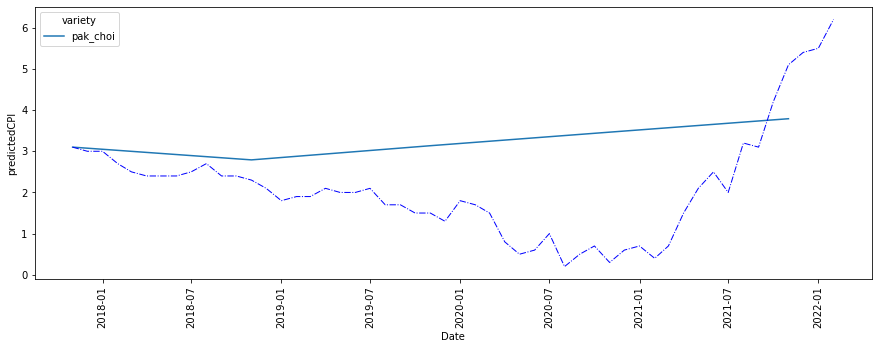



parsnips


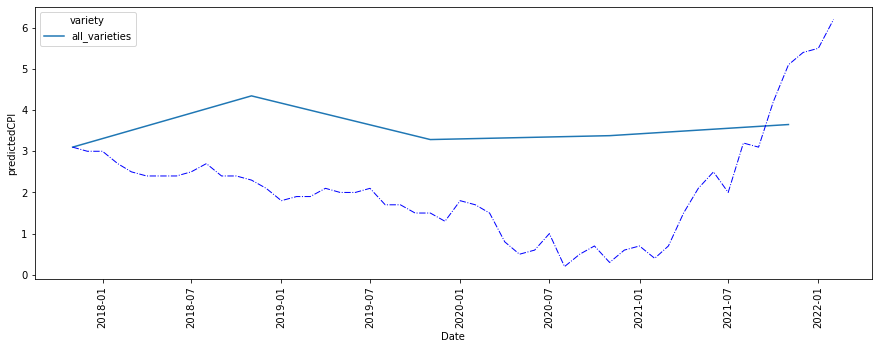



rocket


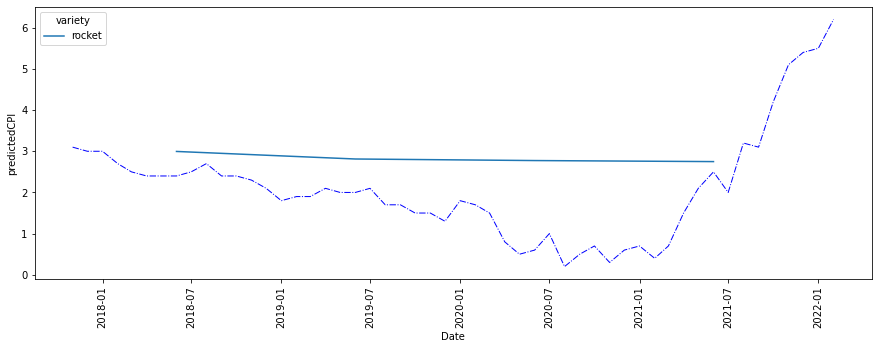



spinach_leaf


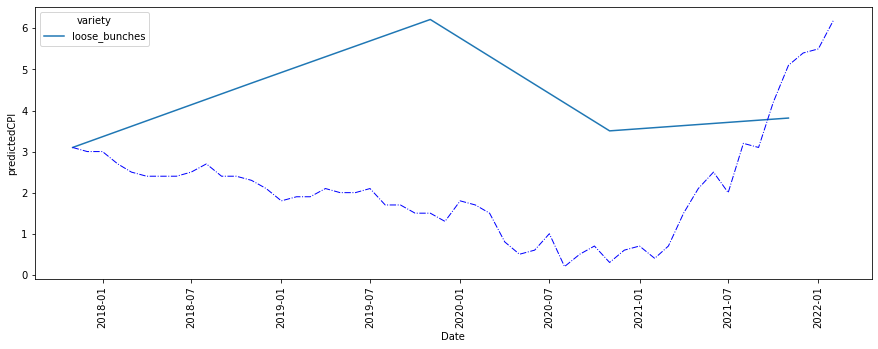



spring_greens


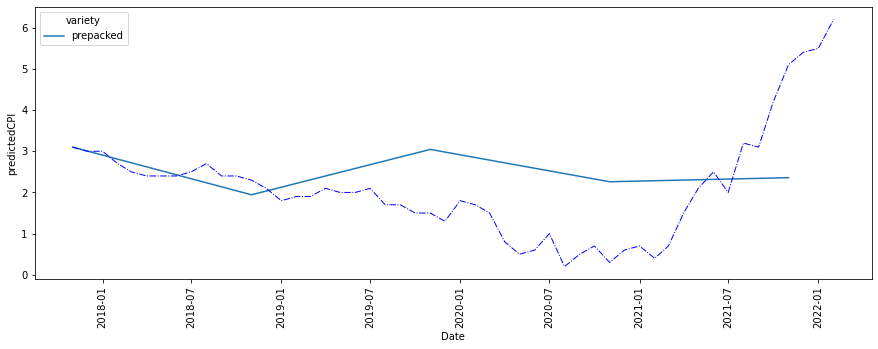



swede


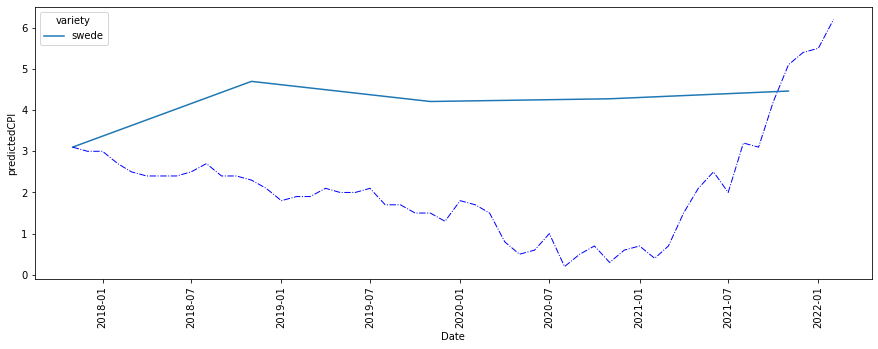



sweetcorn


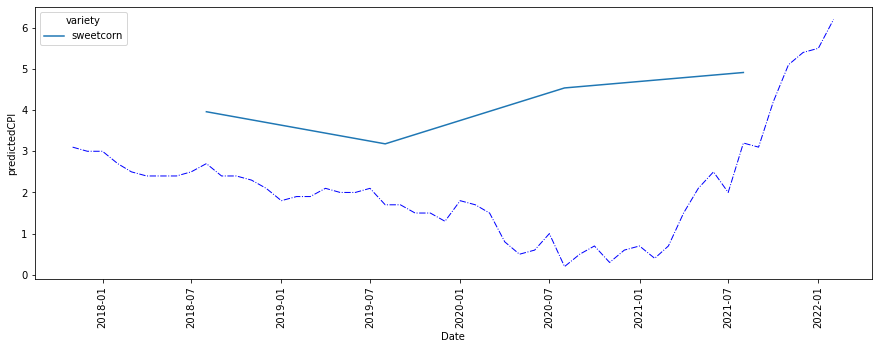



tomatoes


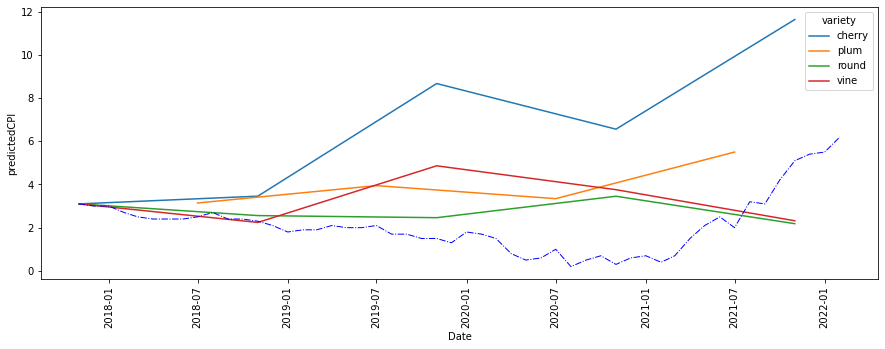



turnip


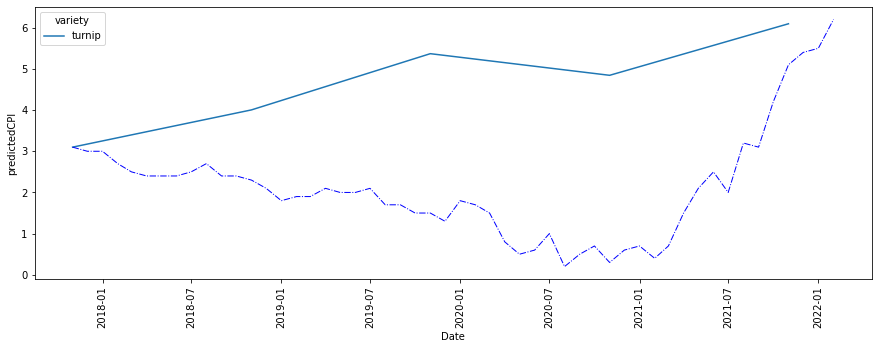



watercress


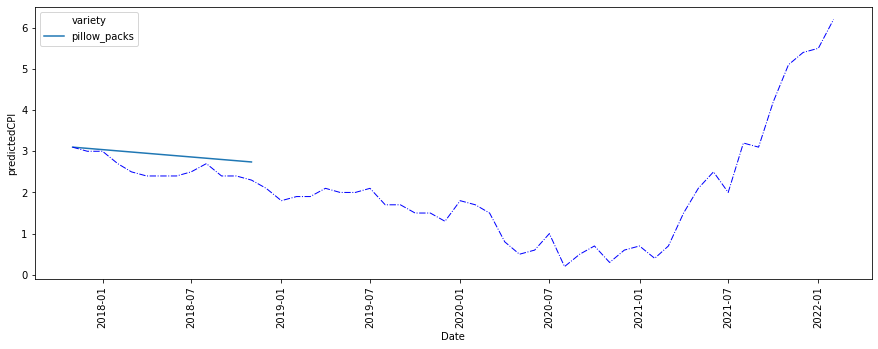



tulips


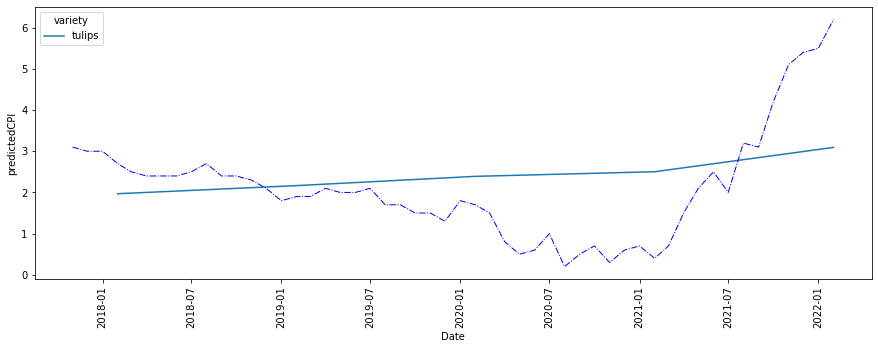



poinsettia


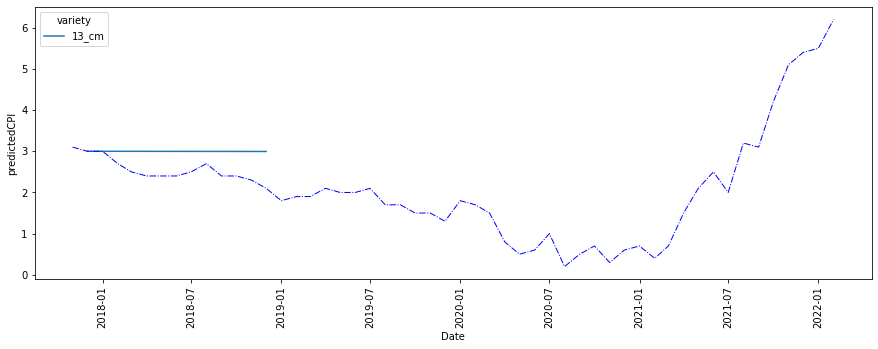



rhubarb


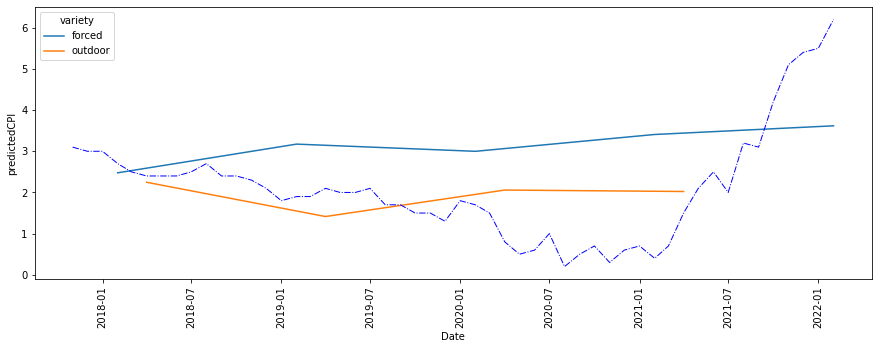



asparagus


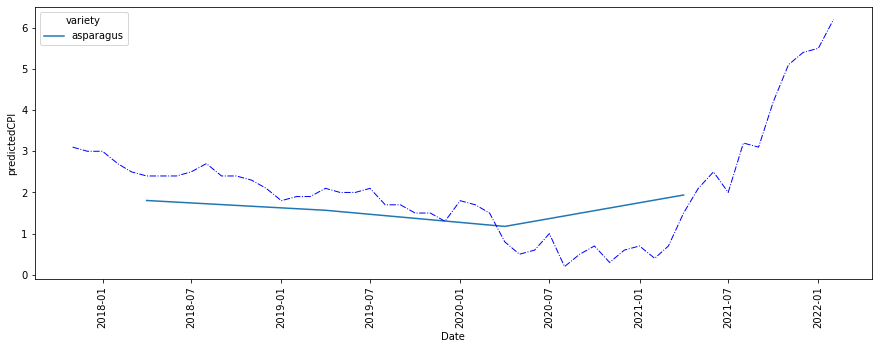



gladioli


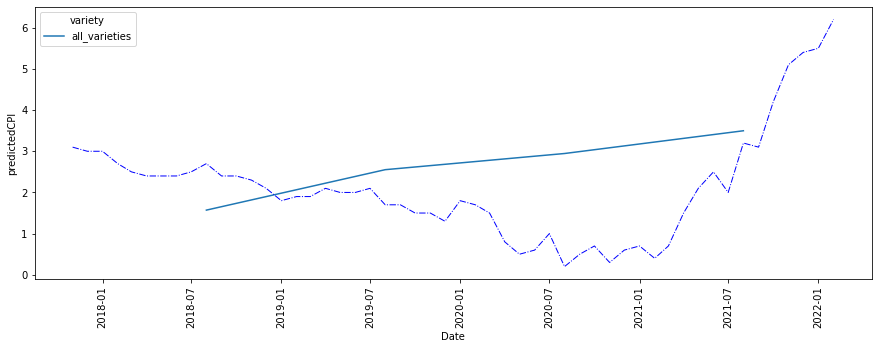



blueberries


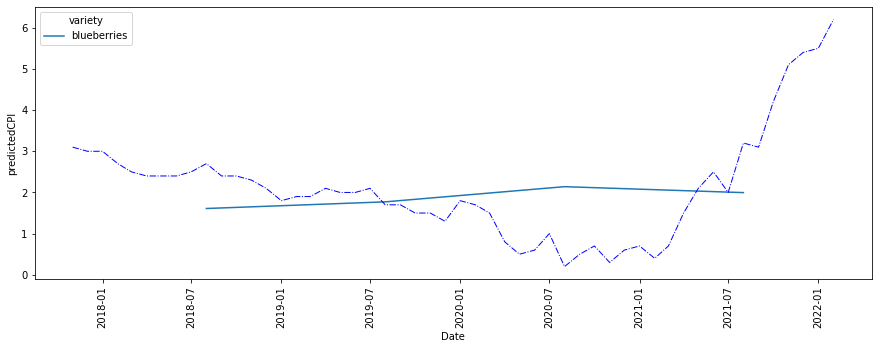



cherries


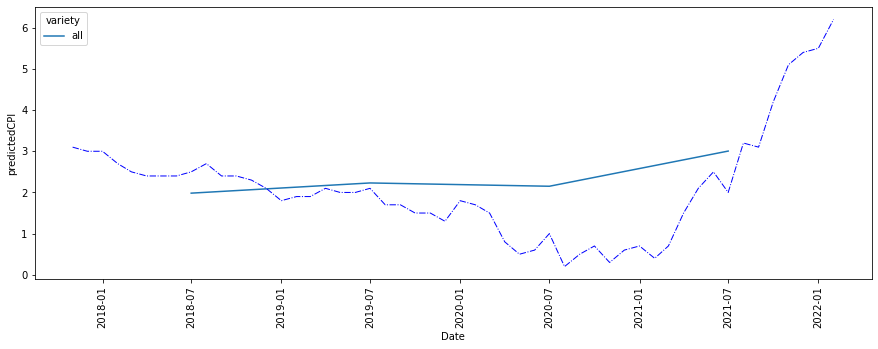



gooseberries


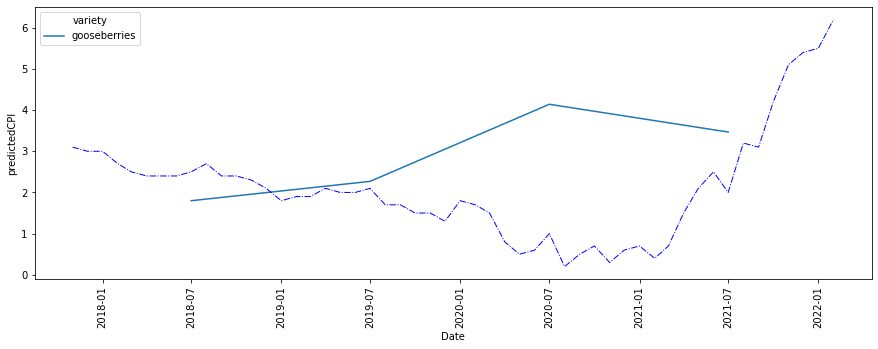



beans


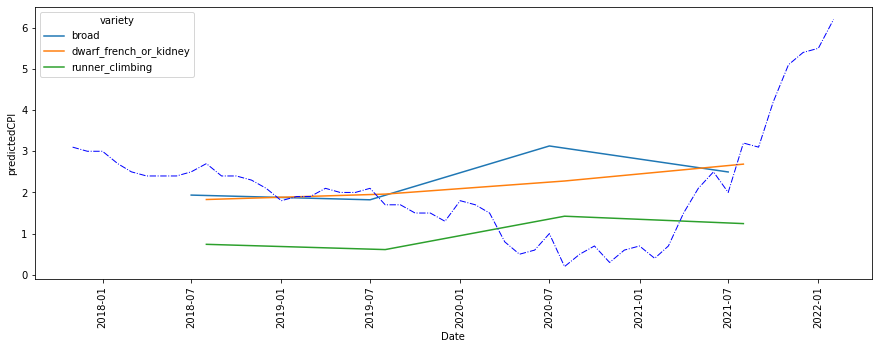



peas


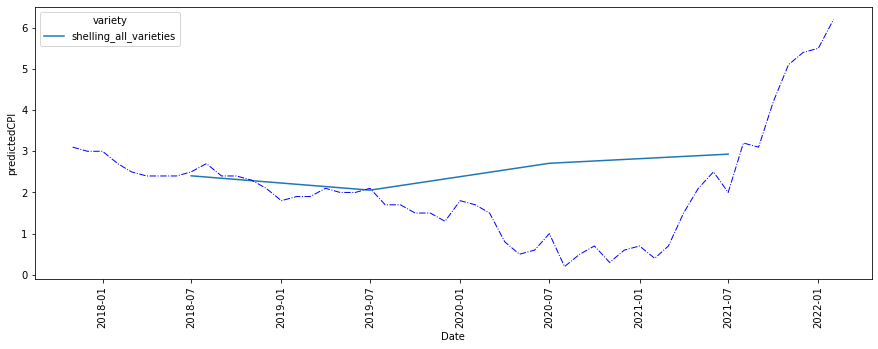



blackberries


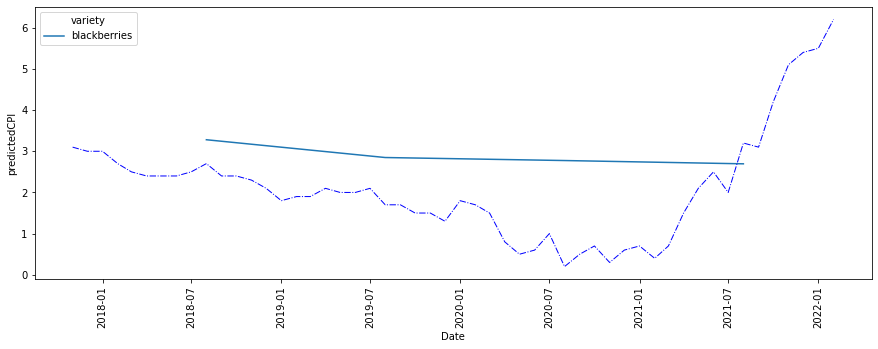



currants


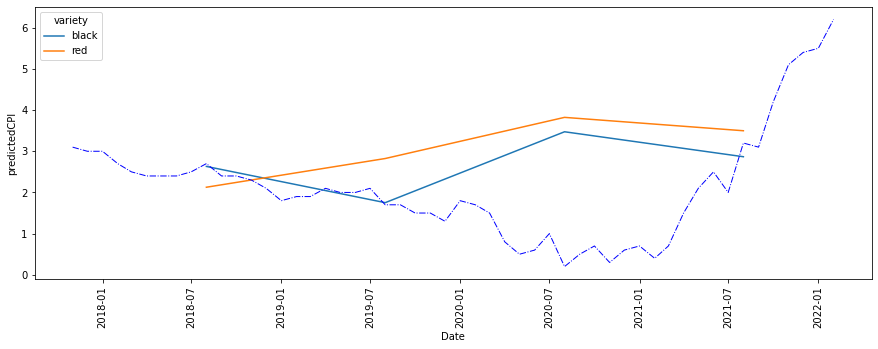



plums


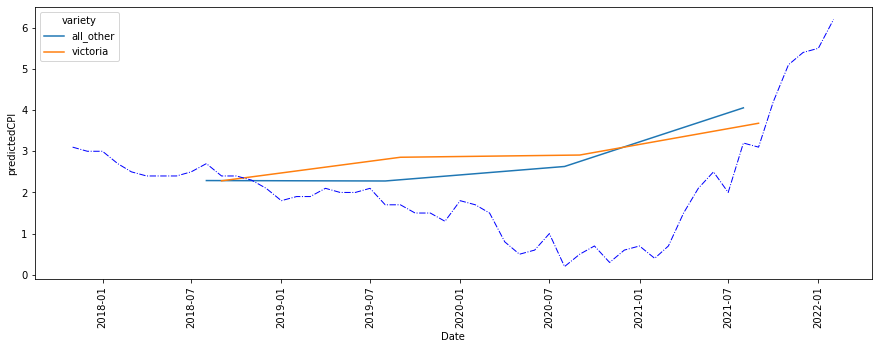



chinese_leaf


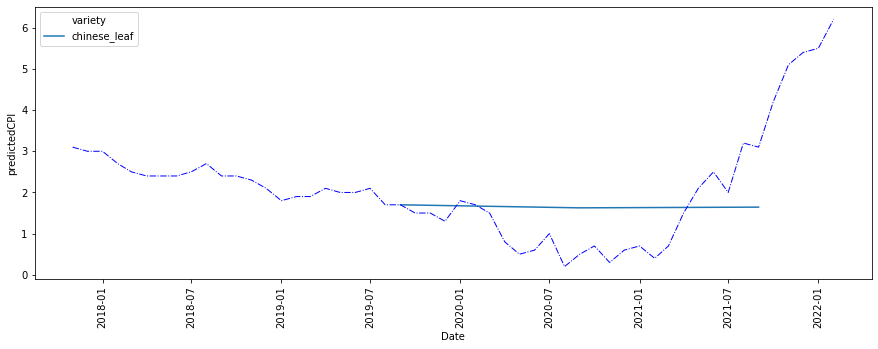

In [302]:
for i in predictedCPIDF['item'].unique():
    x1 = predictedCPIDF[predictedCPIDF['item']==i][['Date','variety','predictedCPI']]
    
    print()
    print()
    print(i)
    fig, (ax1) = plt.subplots(1, 1, figsize=(15, 5))
    sns.lineplot(ax = ax1,data = x1, x = 'Date', y='predictedCPI', hue='variety')
    inf = inflationData[inflationData['Date']>=predictedCPIDF['Date'].min()]
    
    
    plt.plot(inf['Date'],inf['CPI'], color = 'blue', linewidth=1, linestyle='-.')
    ax1.tick_params(axis="x", labelrotation=90)
    plt.show()
    